In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_excel("/content/EatWestAirlines1.xlsx", engine='openpyxl')

df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [4]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.duplicated().sum()

0

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Use .iloc to select data for scaling
df_scaled_values = sc.fit_transform(df.iloc[:, 1:])
df_scaled = pd.DataFrame(df_scaled_values, columns=df.columns[1:], index=df.index) # Adjust columns to exclude 'ID#'
# Keep 'ID#' as a column in the scaled DataFrame
df_scaled['ID#'] = df['ID#'] #Adding the ID# column back to df_scaled

# Now you can set 'ID#' as the index
df_scaled = df_scaled.set_index('ID#')
df_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                        
1    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
2    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
3    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
4    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
5     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
4017 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
4018 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
4019 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
4020 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4021 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1       -1.104065          -0.328603        -0.362168           1.395454   
2       -0.999926          -0.328603        -0.362168           1.379957   
3       -0.791649          -0.328603        -0.362168           1.411920   
4       -1.104065          -0.328603        -0.362168           1.372208   
5        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
4017    -0.791649          -0.185750        -0.098503          -1.315120   
4018    -0.687511          -0.328603        -0.362168          -1.318994   
4019    -0.375096          -0.328603        -0.362168          -1.315604   
4020    -1.104065           0.028531        -0.098503          -1.316088   
4021    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  
ID#             
1    -0.766919  
2    -0.766919  
3    -0.766919  
4    -0.766919  
5     1.303918  
...        ...  
4017  1.303918  
4018  1.303918  
4019  1.303918  
4020 -0.766919  
4021 -0.766919  

[3999 rows x 11 columns]

In [7]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 374.9 KB


In [8]:
df_scaled.describe() #Outliers present in alomost every column as diff between 75% and max is high.

Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   2.842882e-17  6.574164e-17  1.705729e-16  3.038330e-16  1.350369e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
25%   -5.465676e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
50%   -3.027332e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
75%    1.866028e-01 -1.862987e-01  6.831212e-01 -9.824189e-02 -6.276658e-02   
max    1.618884e+01  1.422486e+01  2.135821e+00  1.344898e+01  2.042732e+01   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3.999000e+03  3.999000e+03        3999.000000     3.999000e+03   
mean  -2.842882e-17 -7.817925e-17           0.000000     1.776801e-17   
std    1.000125e+00  1.000125e+00           1.000125     1.000125e+00   
min   -7.099918e-01 -1.208203e+00          -0.328603    -3.621679e-01   
25%   -6.582276e-01 -8.957878e-01          -0.328603    -3.621679e-01   
50%   -4.130308e-01  4.145743e-02          -0.328603    -3.621679e-01   
75%    2.756198e-01  5.621492e-01          -0.106466    -9.850333e-02   
max    1.020957e+01  7.747696e+00          21.683004     1.361205e+01   

       Days_since_enroll        Award?  
count       3.999000e+03  3.999000e+03  
mean        5.685763e-17  1.421441e-17  
std         1.000125e+00  1.000125e+00  
min        -1.993611e+00 -7.669193e-01  
25%        -8.661823e-01 -7.669193e-01  
50%        -1.092530e-02 -7.669193e-01  
75%         8.097050e-01  1.303918e+00  
max         2.023095e+00  1.303918e+00

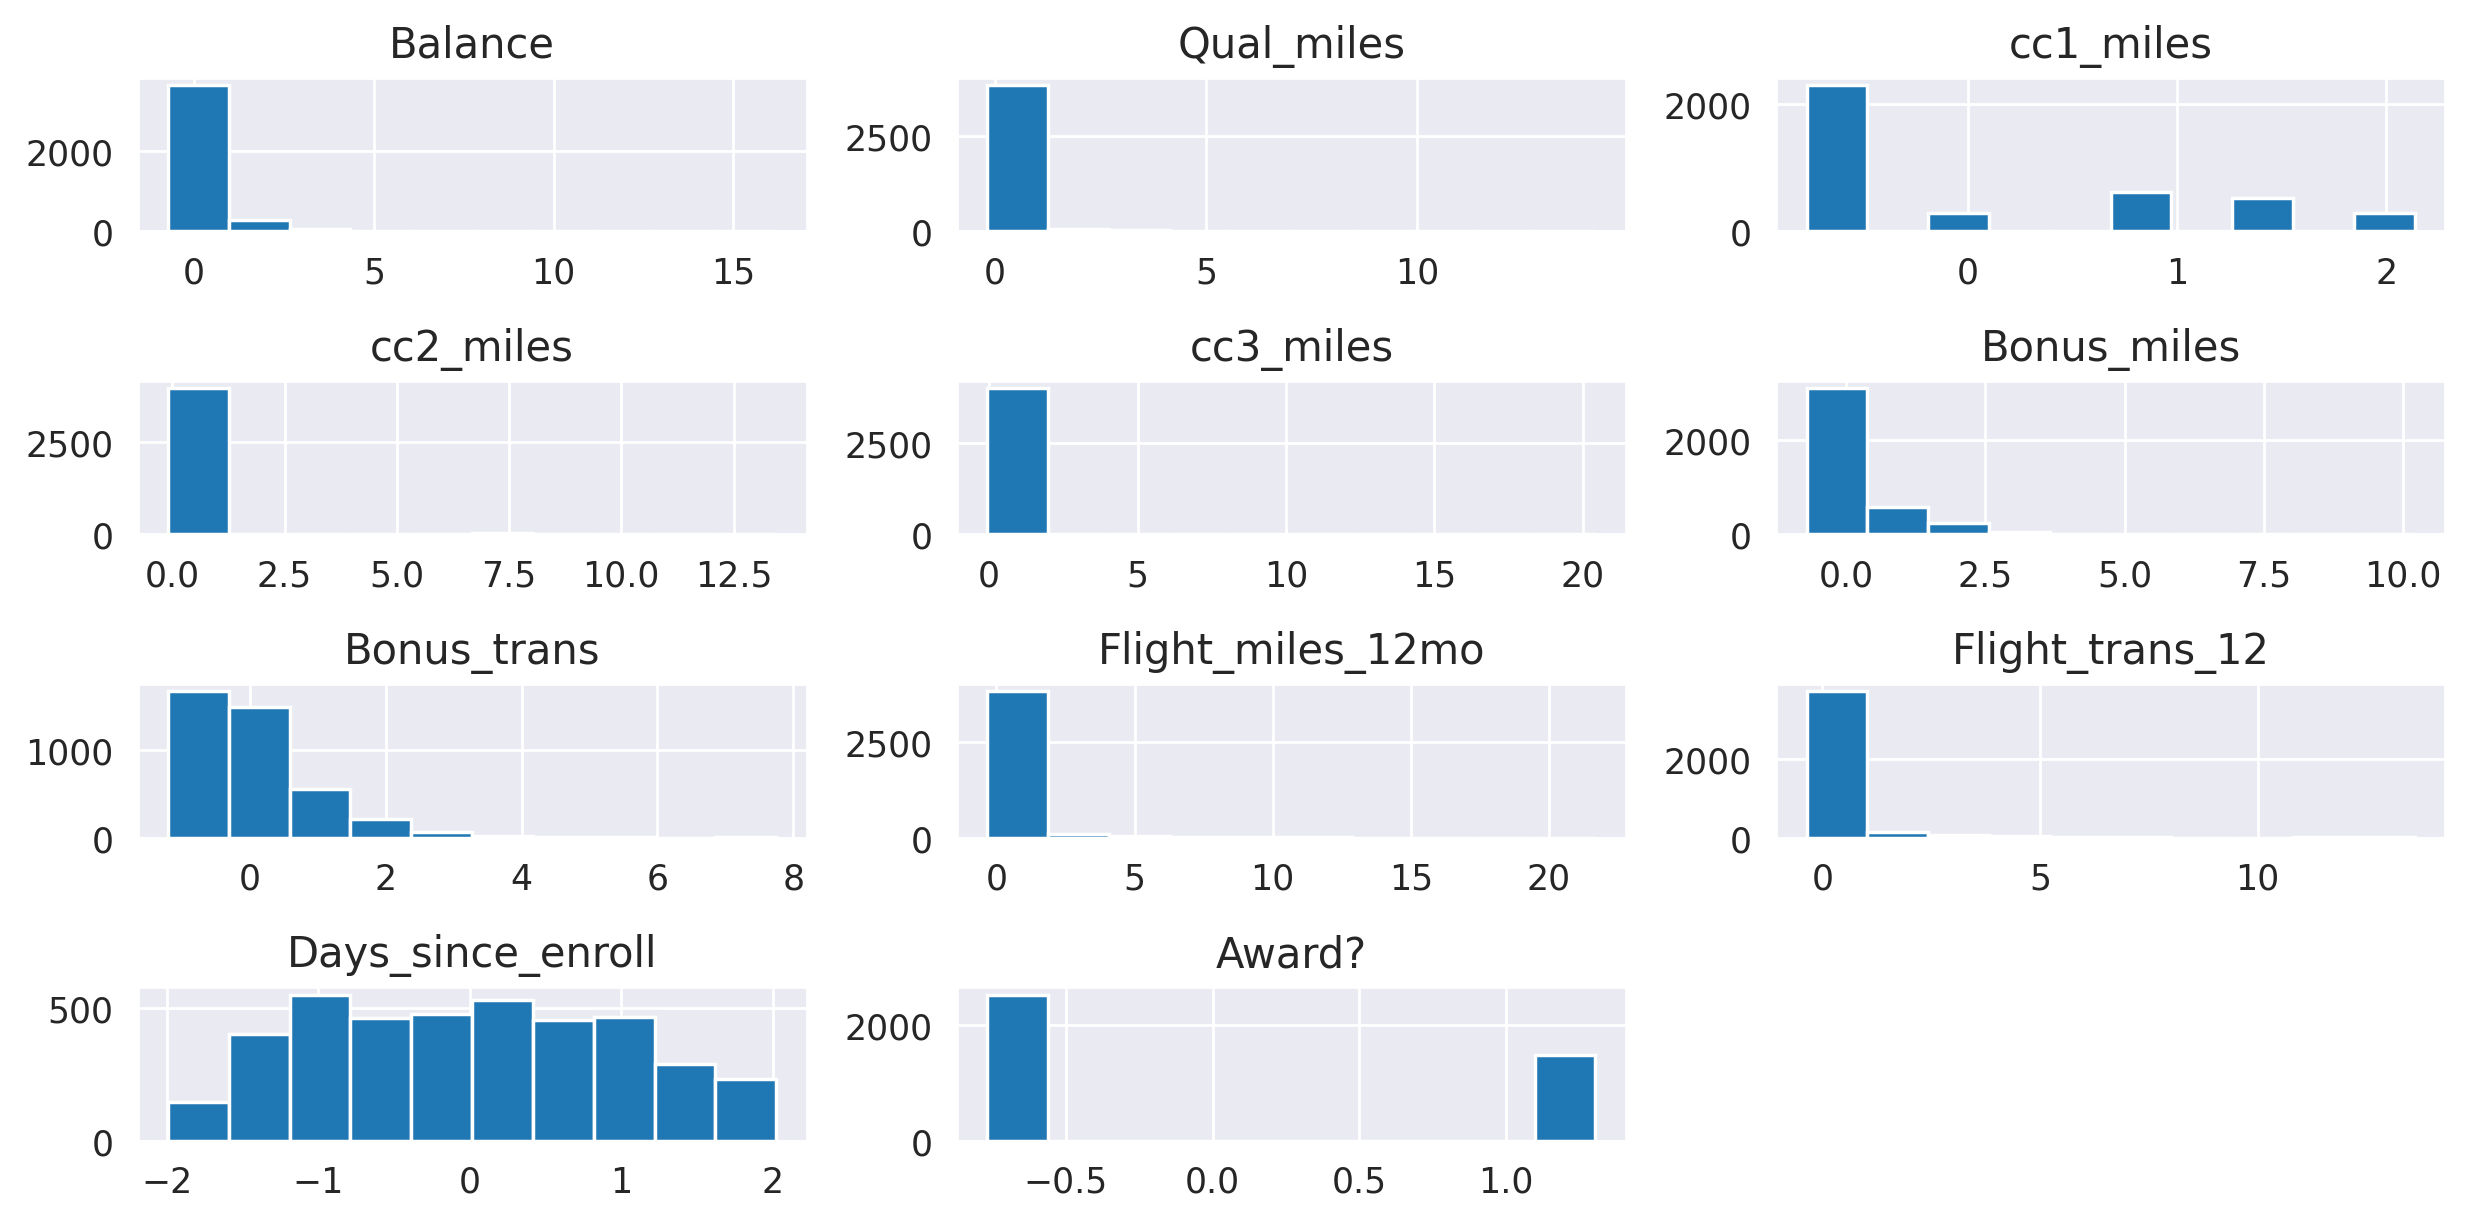

In [9]:
df_scaled.hist()
plt.tight_layout()

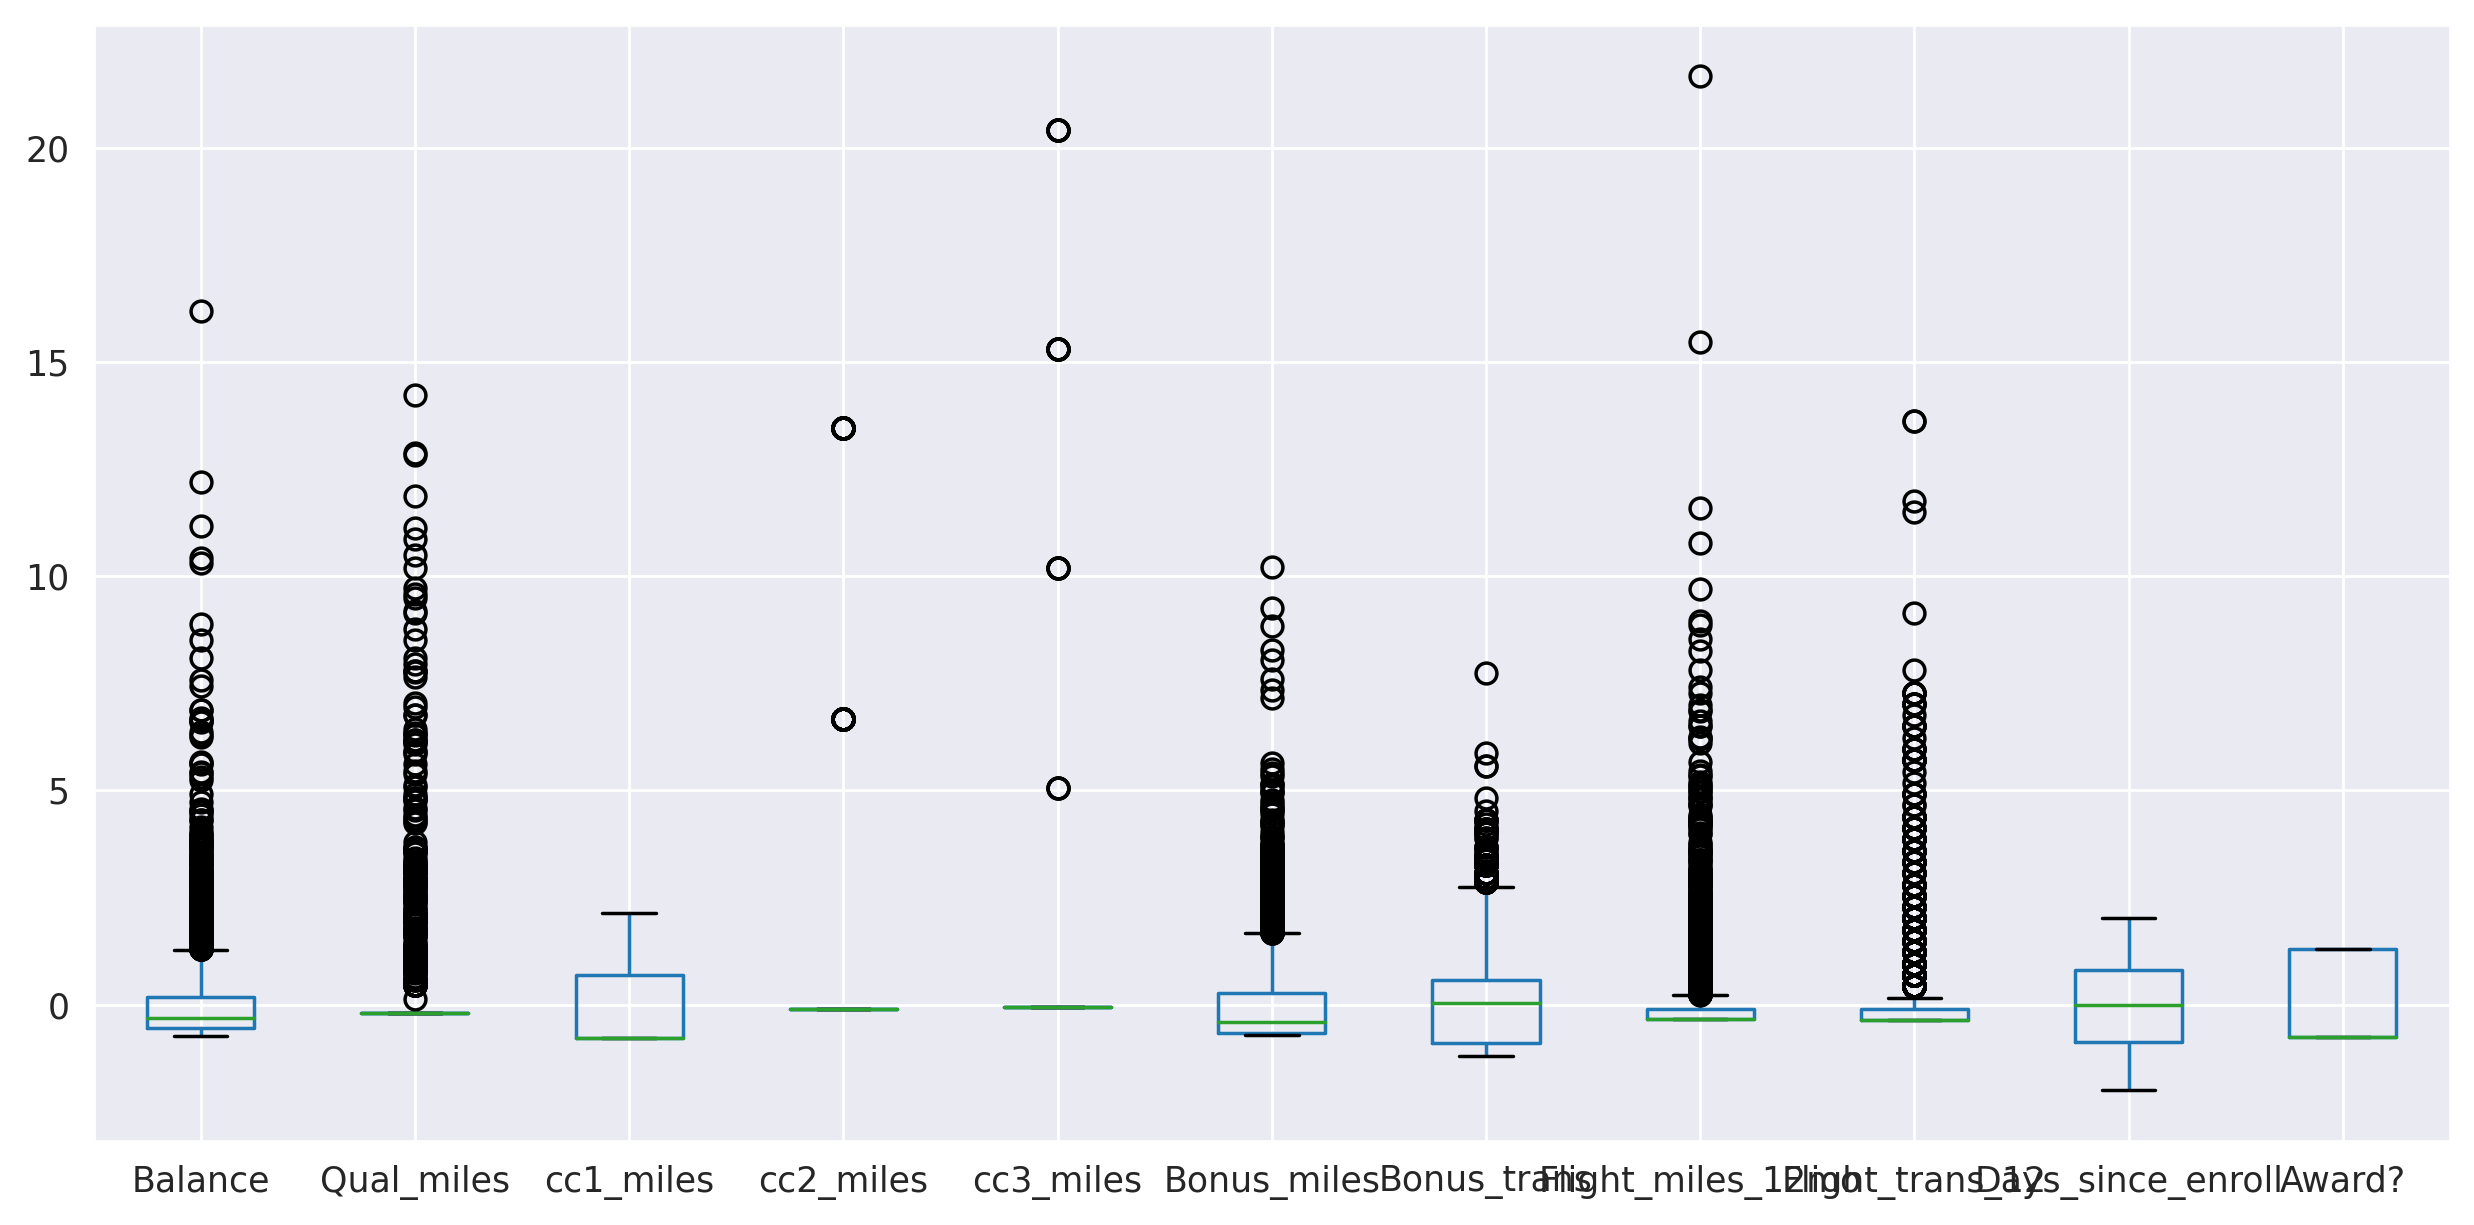

In [10]:
df_scaled.boxplot()
plt.tight_layout()

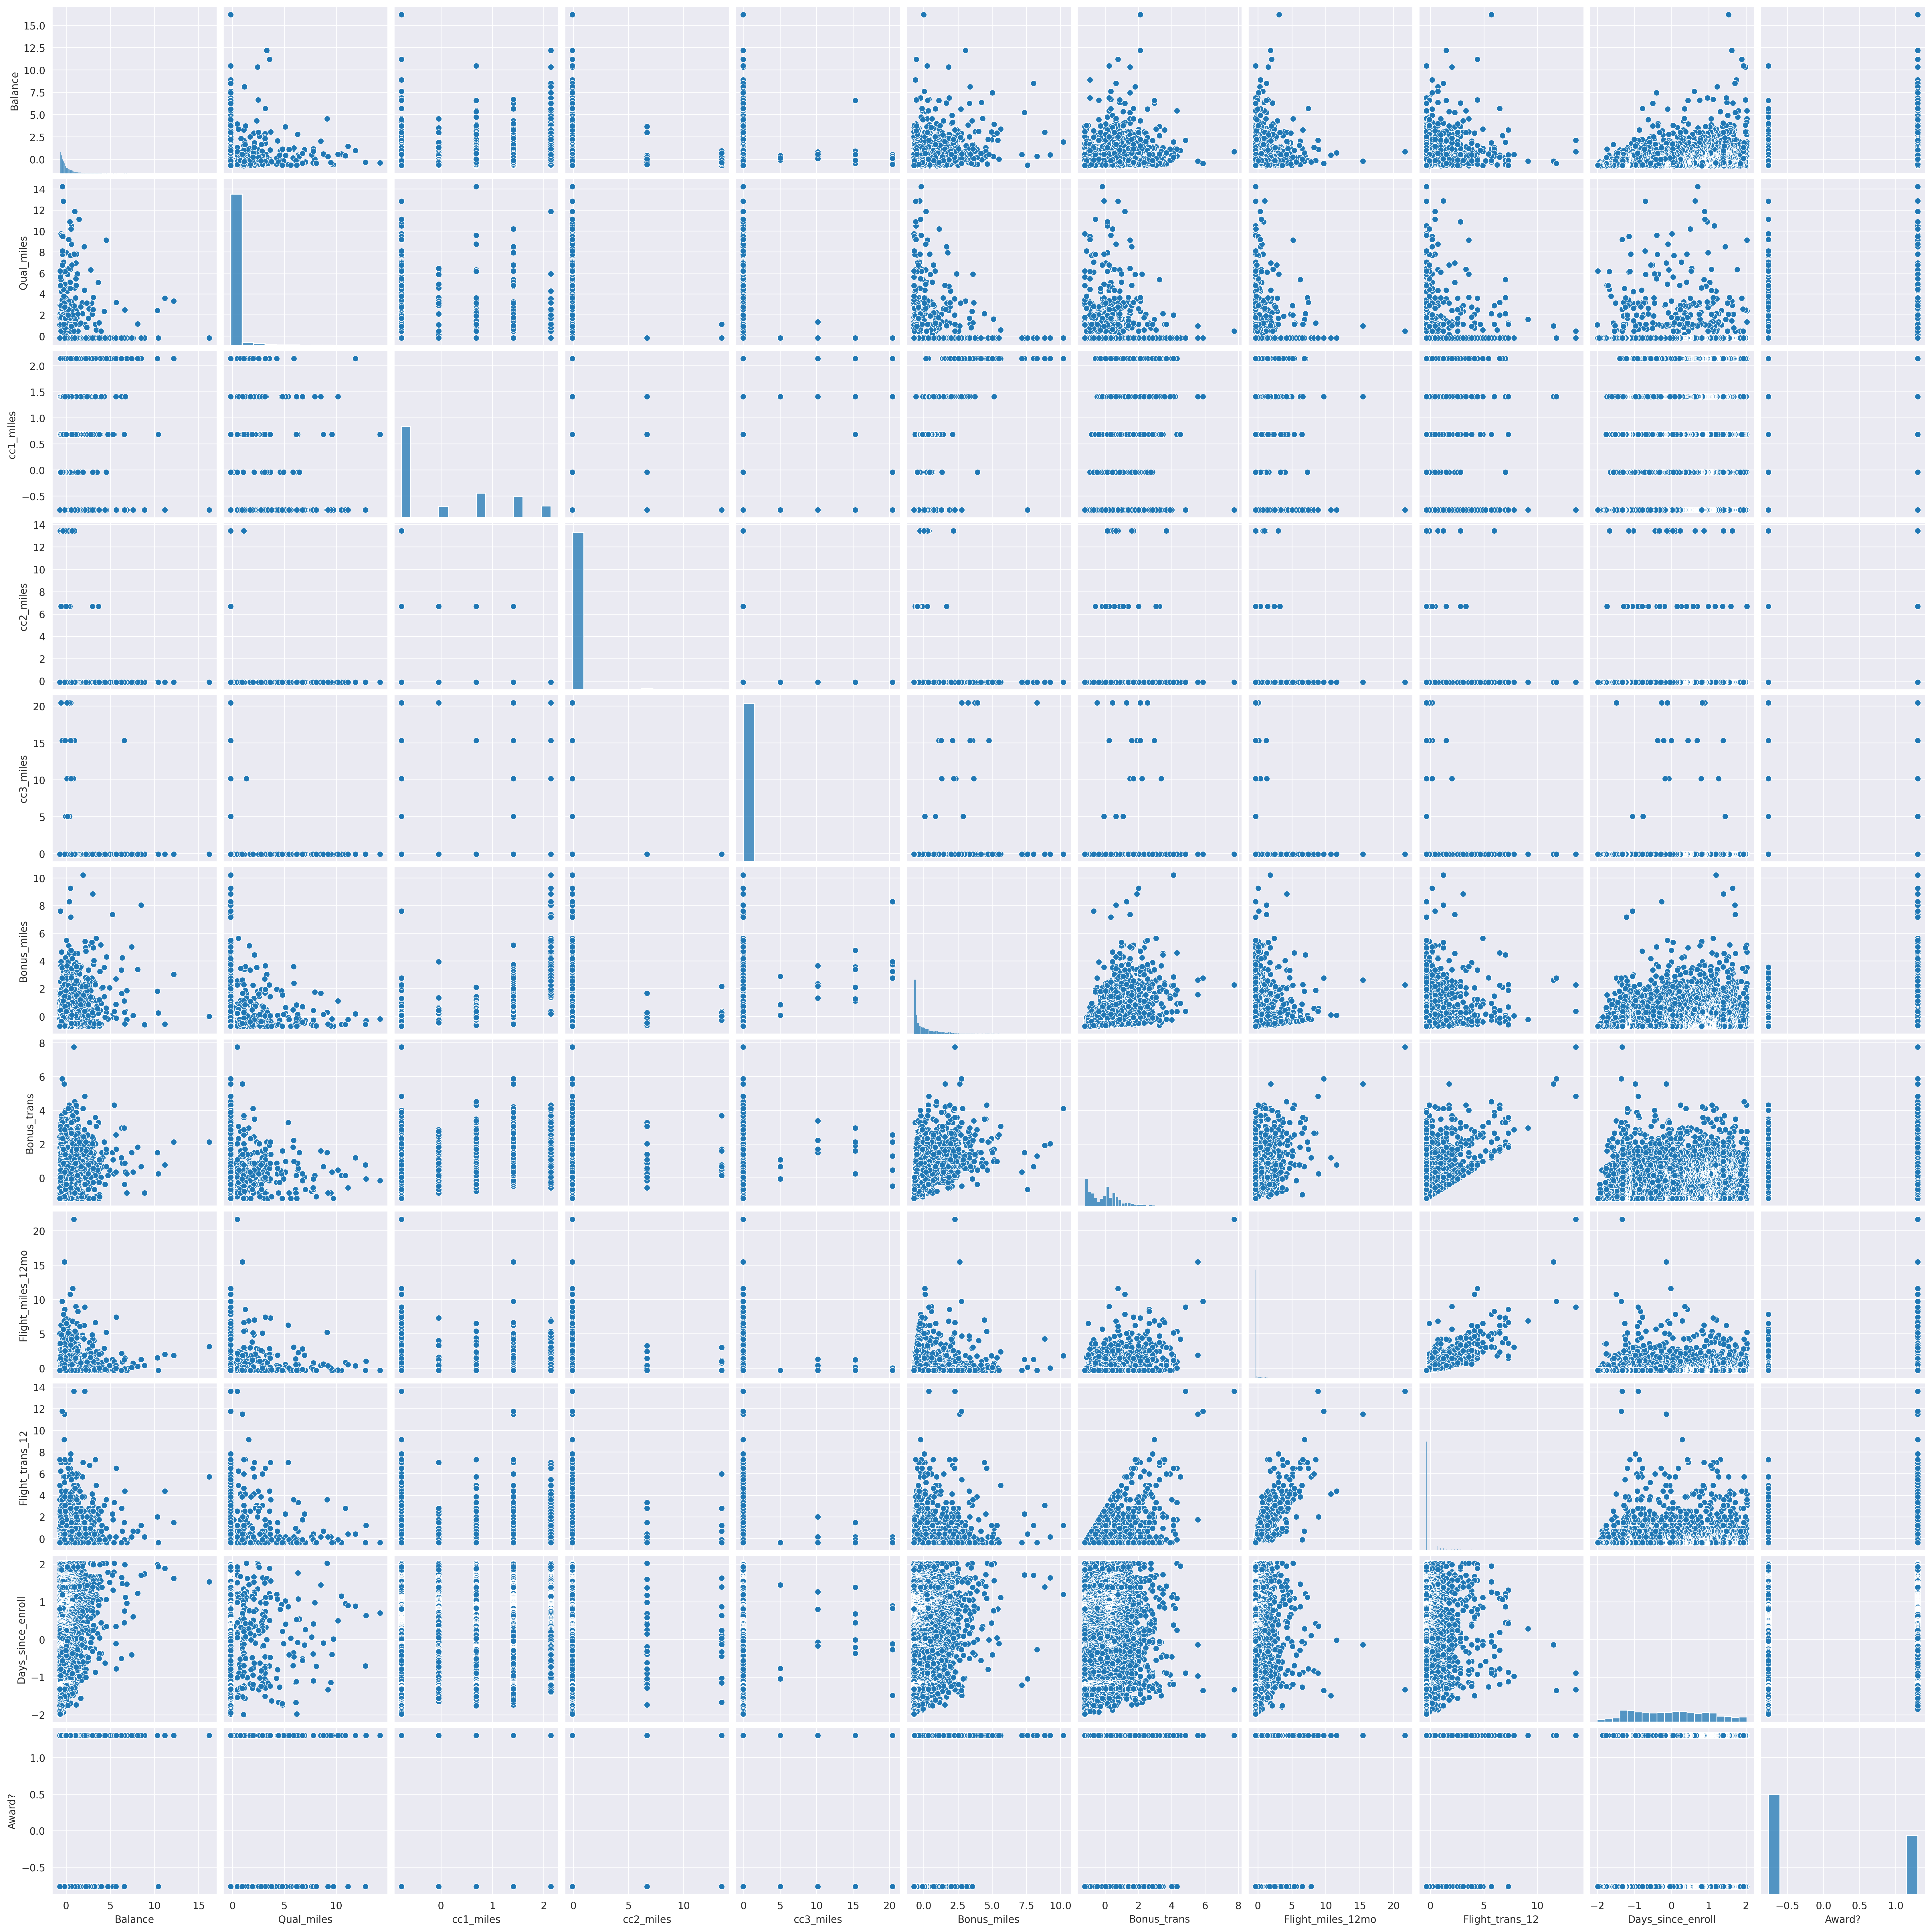

In [11]:
sns.pairplot(df_scaled)#only 1 cluster with outliets can be seen

#K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
#Assume k=10
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

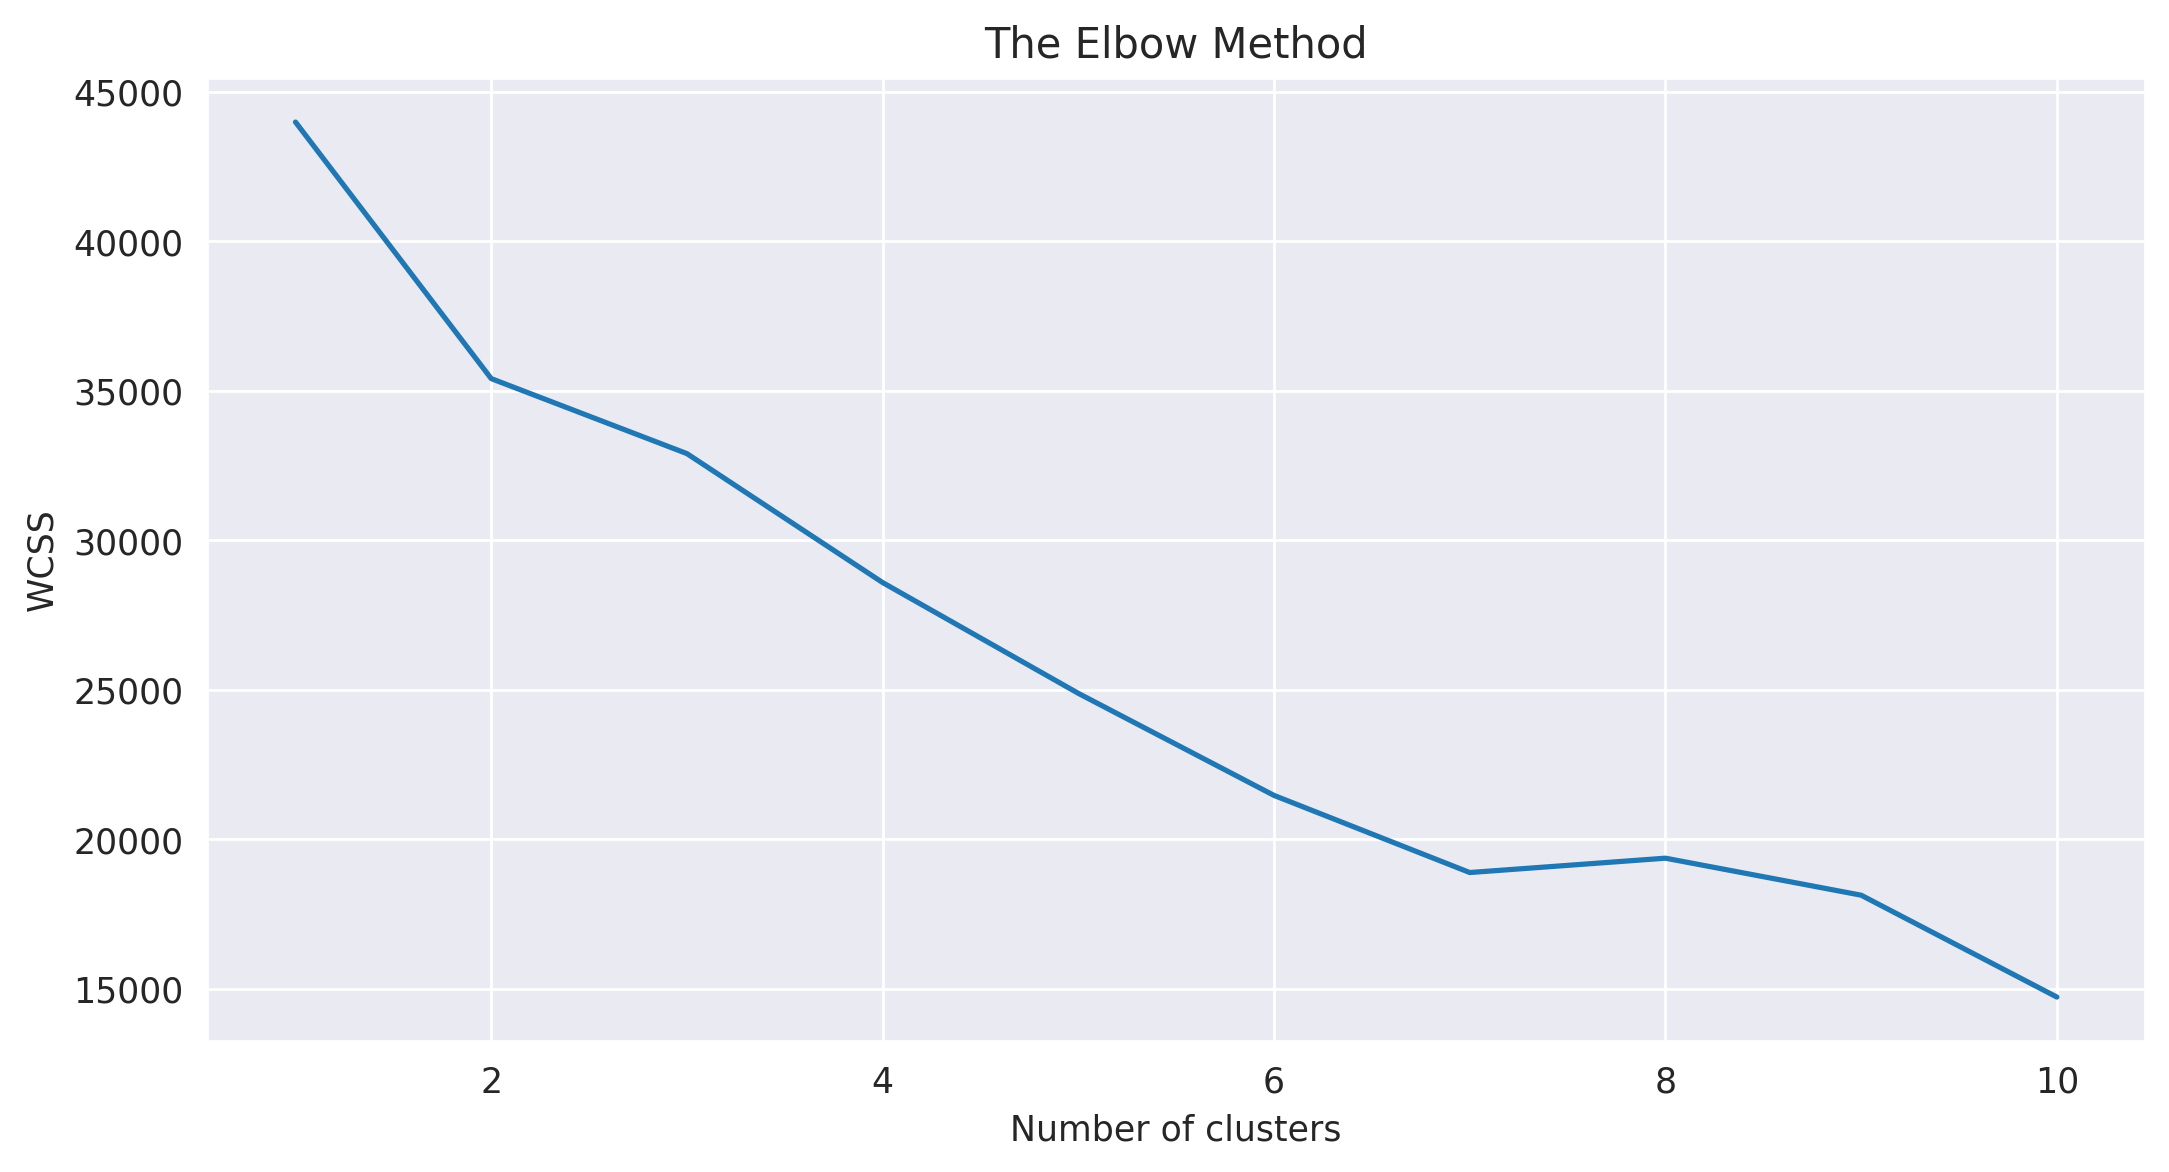

In [14]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
wcss

[43989.0000000001,
 35409.516629861384,
 32901.45804218546,
 28589.20585898687,
 24884.115340435033,
 21470.51454980924,
 18891.750169018418,
 19371.700292851994,
 18134.257221538734,
 14727.658831288609]

In [16]:
Kmeans=KMeans(n_clusters=2,random_state=0)
predict_2=Kmeans.fit_predict(df_scaled)
print(predict_2)
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,predict_2)

[1 1 1 ... 1 1 1]


0.32542136327826215

In [17]:
Cluster_3=KMeans(n_clusters=3,random_state=0)
predict_3=Cluster_3.fit_predict(df_scaled)
predict_3
silhouette_score(df_scaled,predict_3)

0.25804082820132074

In [18]:
Cluster_5=KMeans(n_clusters=5,random_state=0)
predict_5=Cluster_5.fit_predict(df_scaled)
predict_5
silhouette_score(df_scaled,predict_5)

0.26898118579042996

In [19]:
Cluster_7=KMeans(n_clusters=7,random_state=0)
predict_7=Cluster_7.fit_predict(df_scaled)
predict_7
silhouette_score(df_scaled,predict_7)

0.2836461929303771

In [20]:
Cluster_8=KMeans(n_clusters=8,random_state=0)
predict_8=Cluster_8.fit_predict(df_scaled)
predict_8
silhouette_score(df_scaled,predict_8)

0.23361515620582377

In [21]:
Cluster_9=KMeans(n_clusters=9,random_state=0)
predict_9=Cluster_9.fit_predict(df_scaled)
predict_9
silhouette_score(df_scaled,predict_9)

0.2479221353999542

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer  # Import necessary modules

params = {'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
# Use make_scorer to create a scorer from silhouette_score
grid = GridSearchCV(KMeans(), param_grid=params, scoring=make_scorer(silhouette_score), cv=5)
grid.fit(df_scaled)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring=make_scorer(silhouette_score, response_method='predict'))

In [23]:
grid.best_params_

{'n_clusters': 1}

#Silhouette score is max at cluster=2

In [24]:
# Perform clustering with 2 clusters
Cluster_2 = KMeans(n_clusters=2, random_state=0)
predict_2 = Cluster_2.fit_predict(df_scaled) # Generate predict_2 based on the current df_scaled

# Calculate silhouette score
silhouette_score(df_scaled, predict_2)

# Add clusterid to DataFrame
df_scaled['clusterid'] = predict_2

# Group and aggregate data
df_scaled.groupby('clusterid').agg(['mean']).reset_index()



clusterid   Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                 mean       mean      mean      mean      mean        mean   
0         0  0.587113   0.146961   1.12663 -0.030610  0.126082    1.005645   
1         1 -0.283434  -0.070947  -0.54389  0.014777 -0.060867   -0.485484   

  Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll    Award?  
         mean              mean            mean              mean      mean  
0    0.914236          0.362261        0.403107          0.398987  0.701117  
1   -0.441355         -0.174885       -0.194604         -0.192614 -0.338470

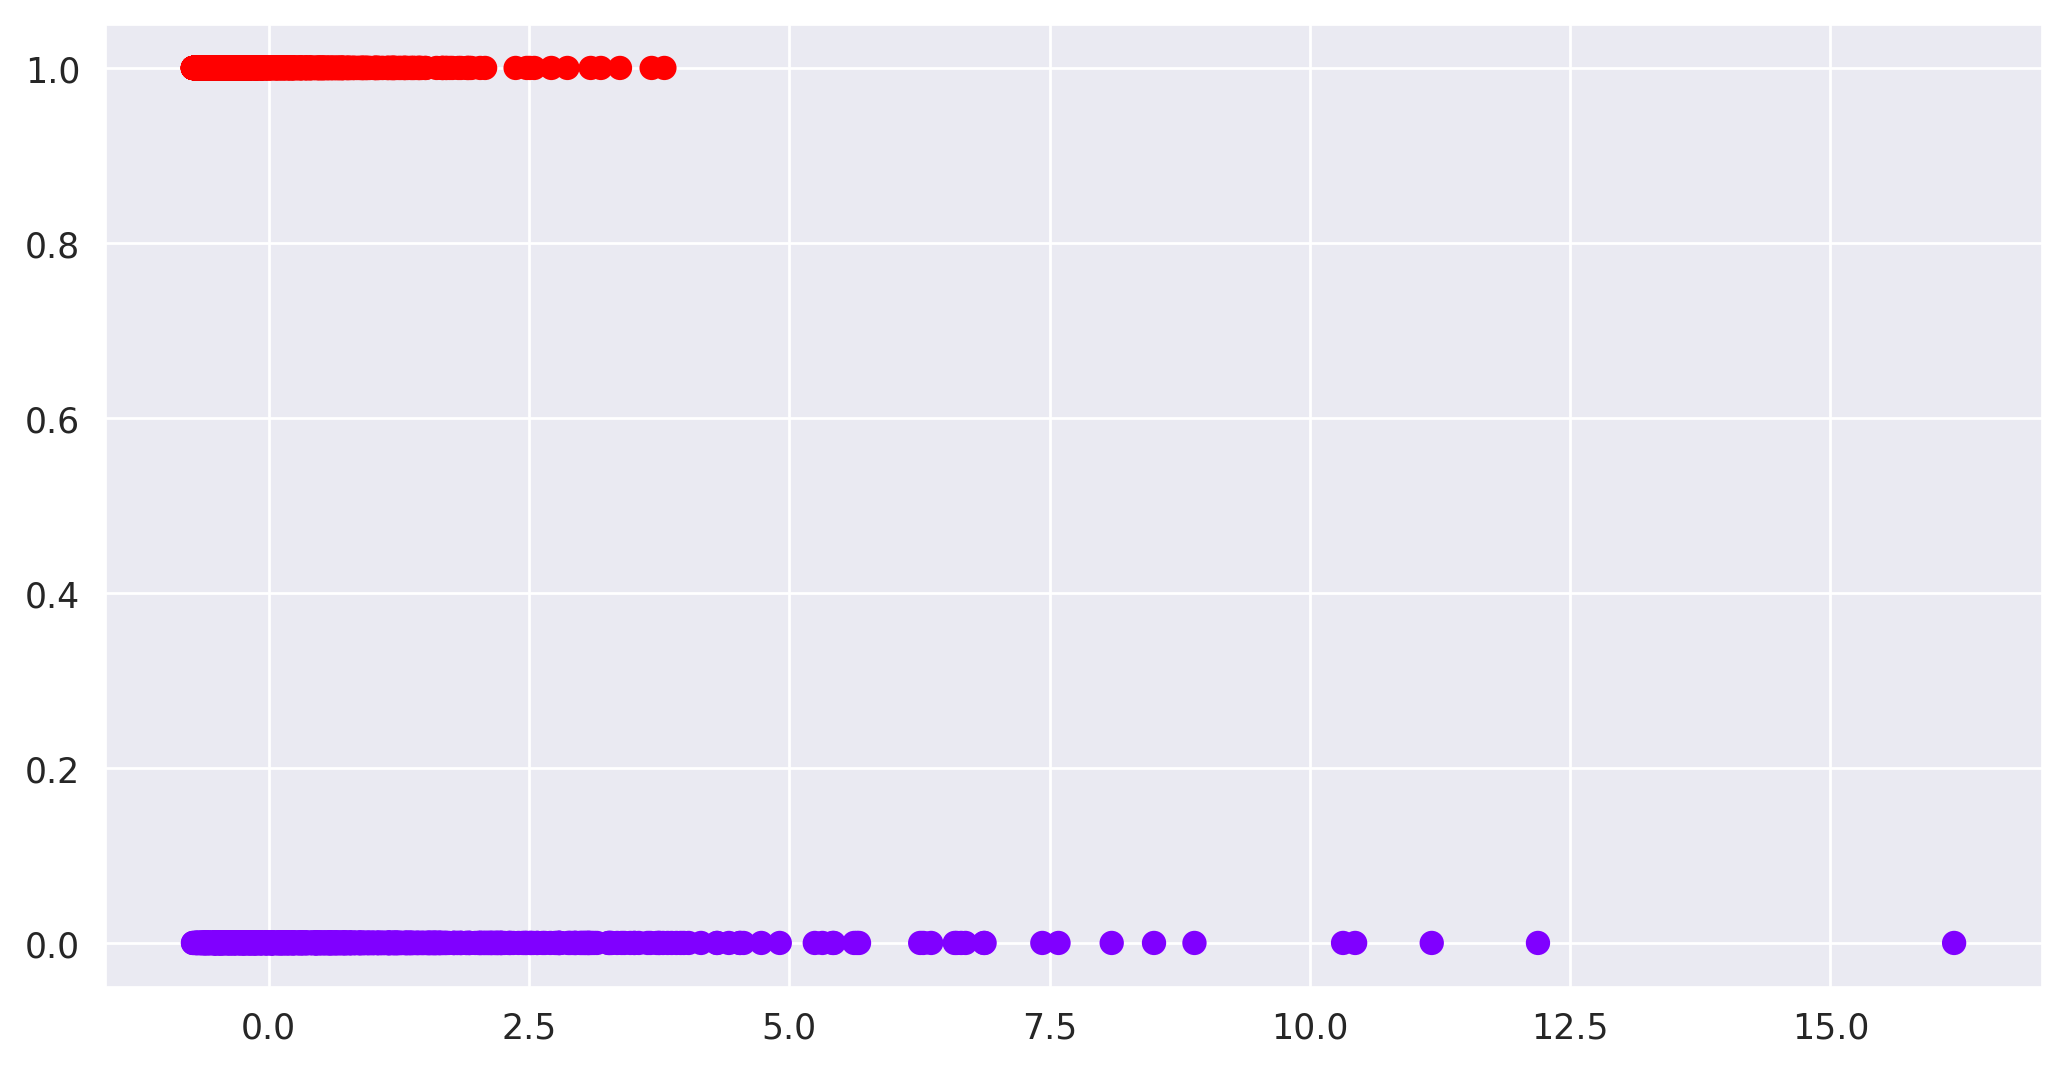

In [25]:
import matplotlib.pyplot as plt

# Use .iloc for integer-location based indexing
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 11], c=predict_2, cmap='rainbow')

#Hierarchical Clustering

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

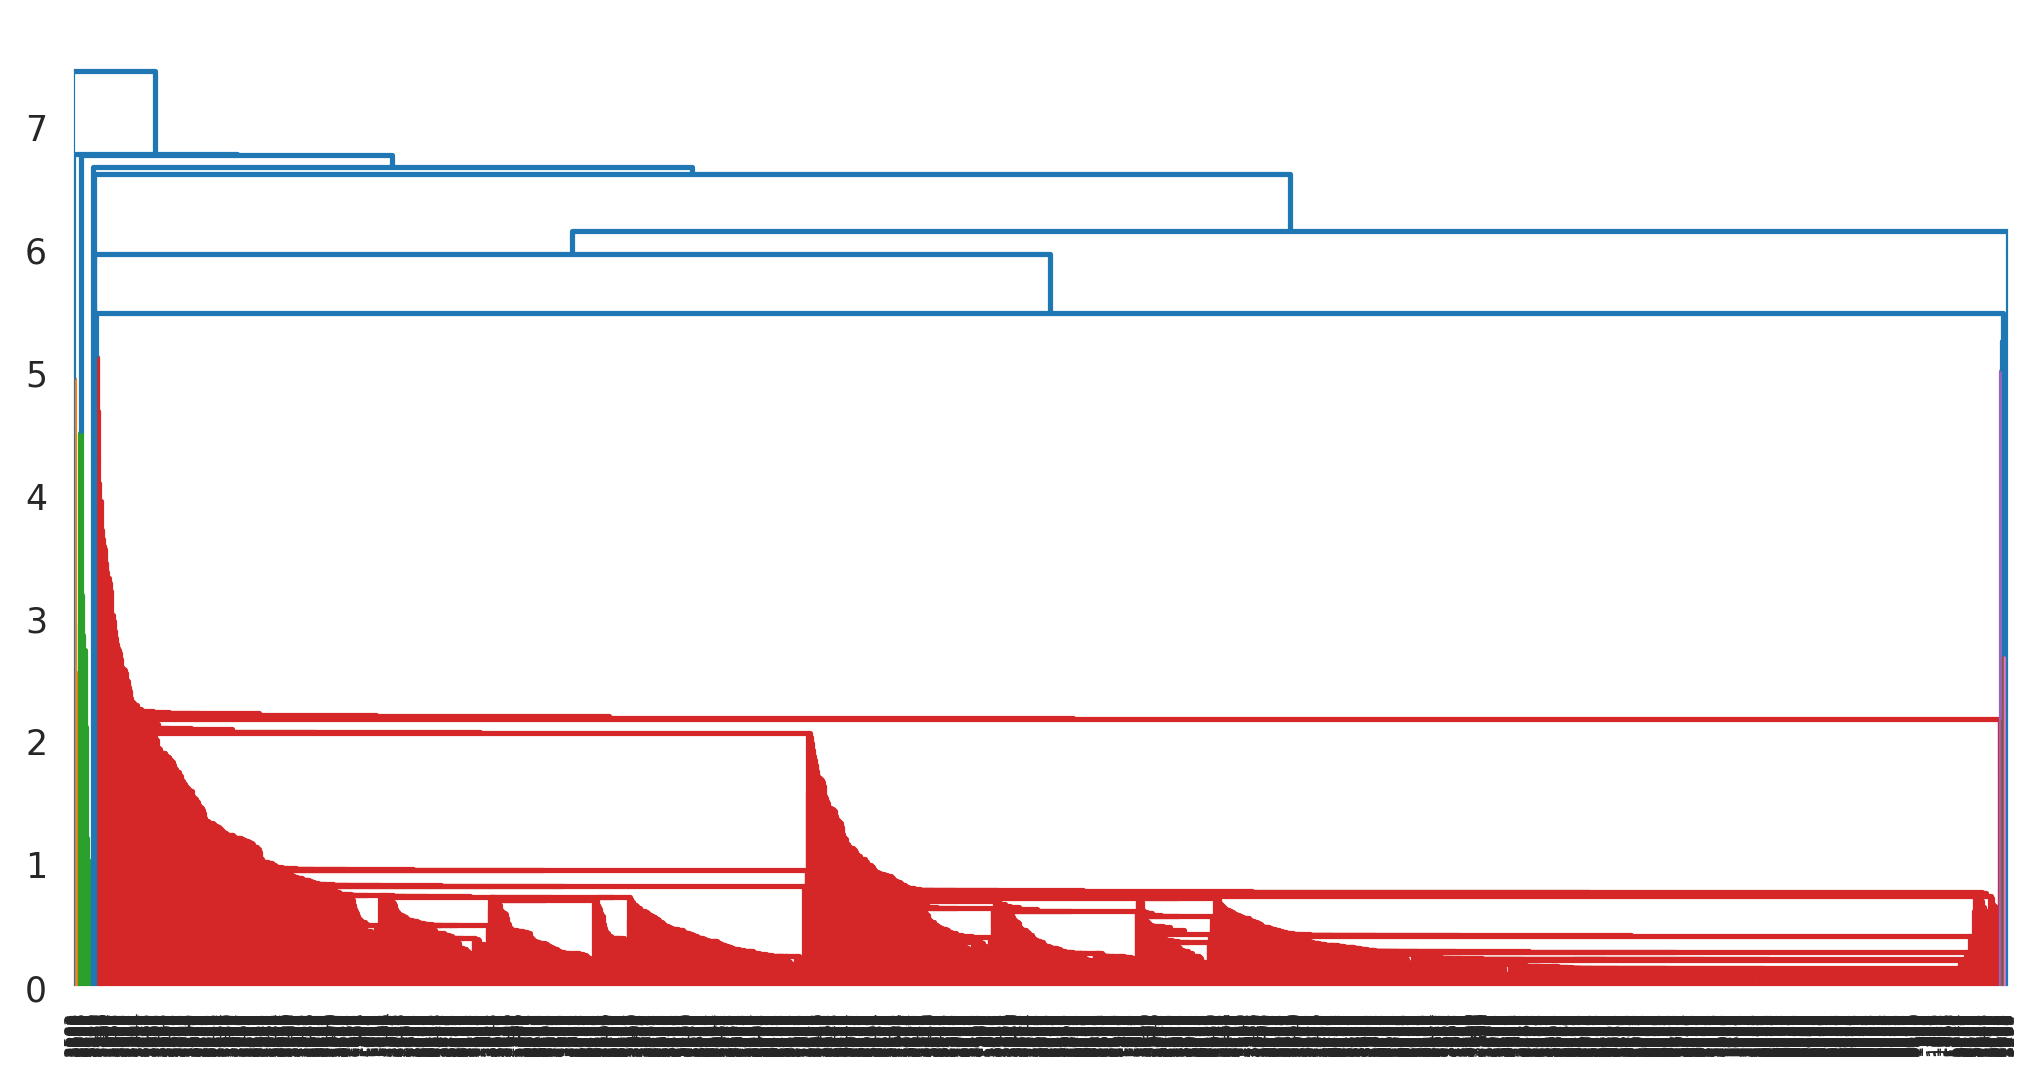

In [27]:
Dendrogram=sch.dendrogram(sch.linkage(df_scaled.iloc[:,:-1],method='single'))

In [28]:
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='single')
hc

AgglomerativeClustering(linkage='single')

In [29]:
y_hc=hc.fit_predict(df_scaled.iloc[:,:-1])
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
df_scaled['h_clusterid']=pd.DataFrame(y_hc)
df_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                        
1    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
2    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
3    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
4    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
5     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
4017 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
4018 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
4019 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
4020 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4021 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1       -1.104065          -0.328603        -0.362168           1.395454   
2       -0.999926          -0.328603        -0.362168           1.379957   
3       -0.791649          -0.328603        -0.362168           1.411920   
4       -1.104065          -0.328603        -0.362168           1.372208   
5        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
4017    -0.791649          -0.185750        -0.098503          -1.315120   
4018    -0.687511          -0.328603        -0.362168          -1.318994   
4019    -0.375096          -0.328603        -0.362168          -1.315604   
4020    -1.104065           0.028531        -0.098503          -1.316088   
4021    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  clusterid  h_clusterid  
ID#                                     
1    -0.766919          1          0.0  
2    -0.766919          1          0.0  
3    -0.766919          1          0.0  
4    -0.766919          1          0.0  
5     1.303918          0          0.0  
...        ...        ...          ...  
4017  1.303918          1          NaN  
4018  1.303918          1          NaN  
4019  1.303918          1          NaN  
4020 -0.766919          1          NaN  
4021 -0.766919          1          NaN  

[3999 rows x 13 columns]

In [31]:
df_scaled.groupby('h_clusterid').agg(['mean']).reset_index()

h_clusterid   Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                   mean       mean      mean      mean      mean        mean   
0         0.0  0.002955   0.001125  0.002454  0.000593  0.000379    0.002105   
1         1.0 -0.657119  -0.186299 -0.769578 -0.098242 -0.062767   -0.546086   

  Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll    Award?  \
         mean              mean            mean              mean      mean   
0    0.001924          0.001557        0.001656          0.008029  0.000984   
1    0.353873         -0.221463       -0.098503         -1.778586 -0.766919   

  clusterid  
       mean  
0  0.672956  
1  1.000000

#Complete Linkage

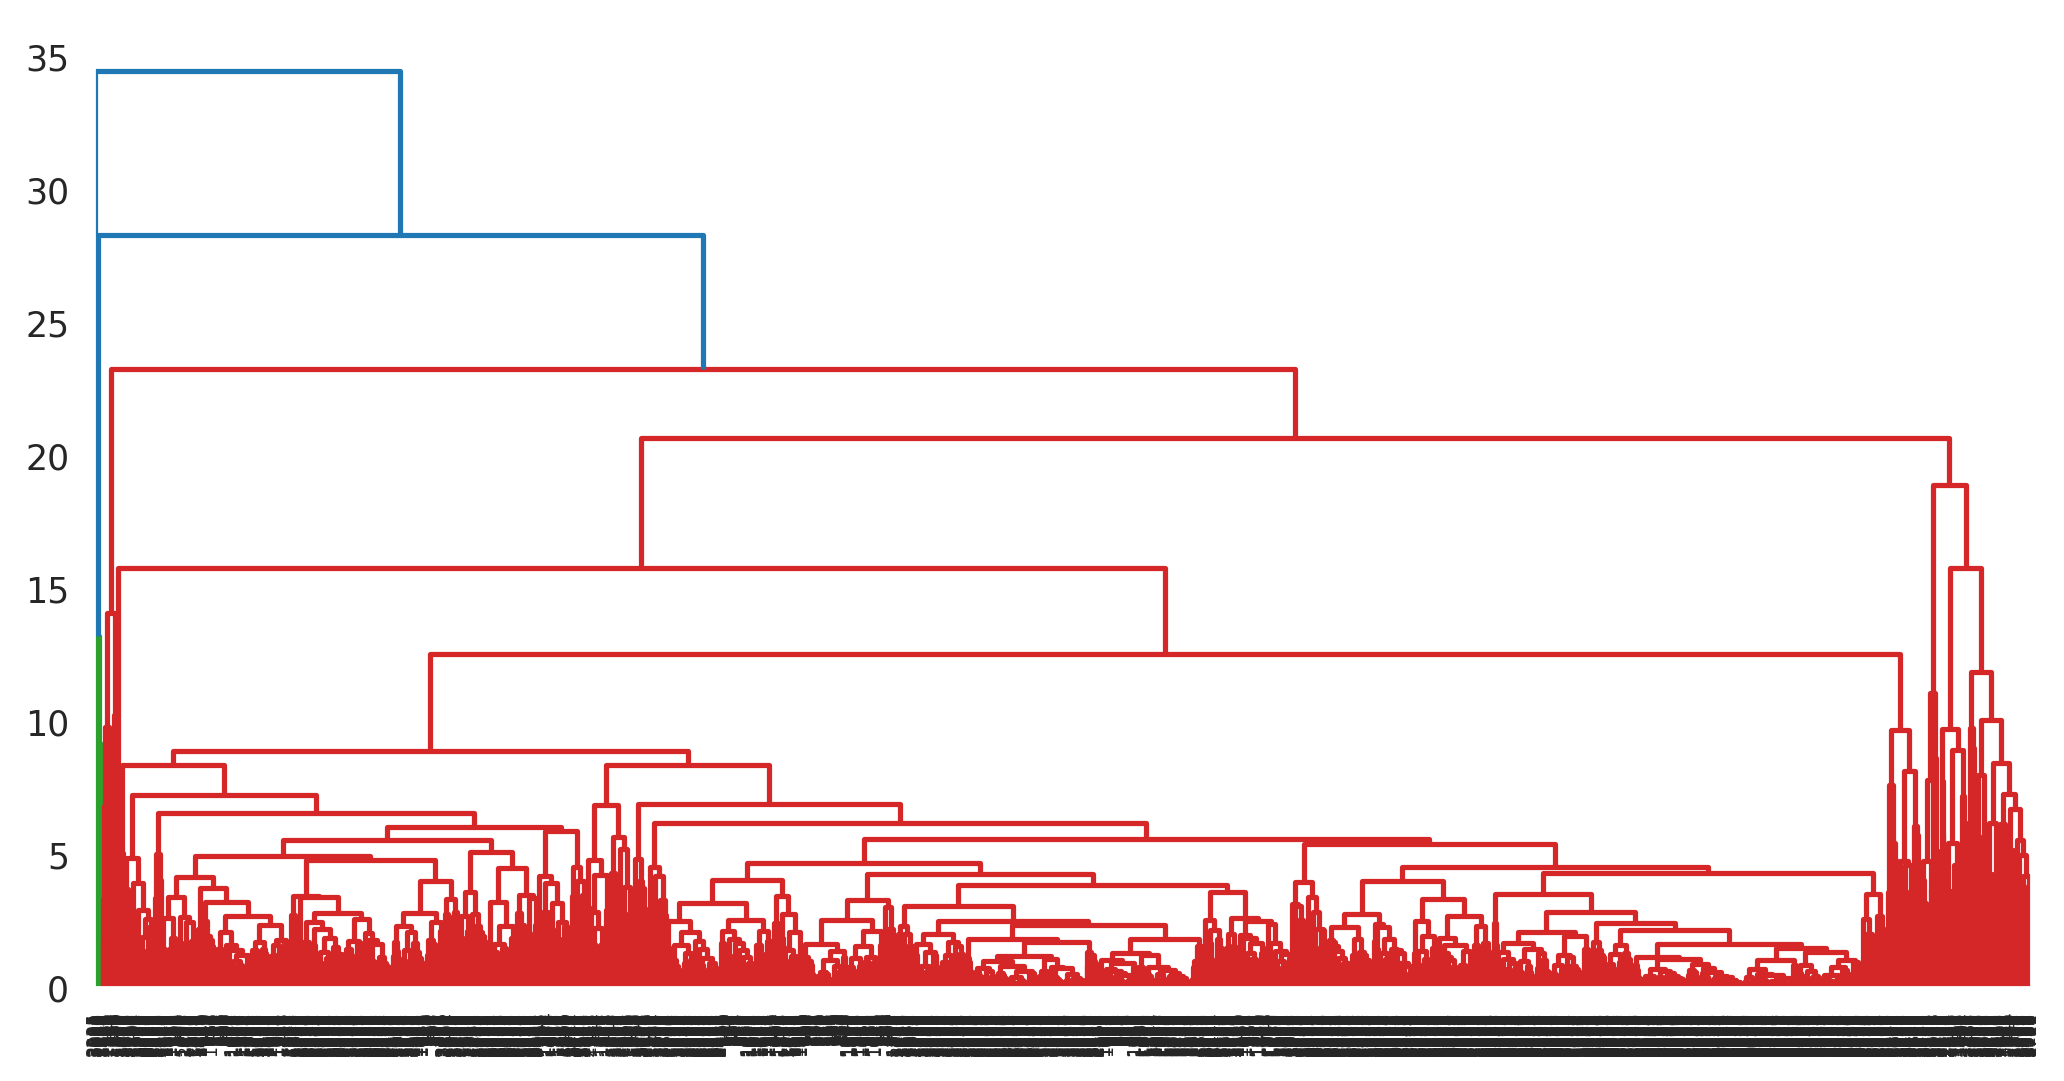

In [32]:
Dendrogram_c=sch.dendrogram(sch.linkage(df_scaled.iloc[:,:-1],method='complete'))

In [33]:
hc_c=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='complete')
hc_c
y_hc_c=hc_c.fit_predict(df_scaled.iloc[:,:-1])
y_hc_c

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
df_scaled['h_clusterid']=pd.DataFrame(y_hc_c)
df_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                        
1    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
2    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
3    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
4    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
5     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
4017 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
4018 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
4019 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
4020 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4021 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1       -1.104065          -0.328603        -0.362168           1.395454   
2       -0.999926          -0.328603        -0.362168           1.379957   
3       -0.791649          -0.328603        -0.362168           1.411920   
4       -1.104065          -0.328603        -0.362168           1.372208   
5        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
4017    -0.791649          -0.185750        -0.098503          -1.315120   
4018    -0.687511          -0.328603        -0.362168          -1.318994   
4019    -0.375096          -0.328603        -0.362168          -1.315604   
4020    -1.104065           0.028531        -0.098503          -1.316088   
4021    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  clusterid  h_clusterid  
ID#                                     
1    -0.766919          1          0.0  
2    -0.766919          1          0.0  
3    -0.766919          1          0.0  
4    -0.766919          1          0.0  
5     1.303918          0          0.0  
...        ...        ...          ...  
4017  1.303918          1          NaN  
4018  1.303918          1          NaN  
4019  1.303918          1          NaN  
4020 -0.766919          1          NaN  
4021 -0.766919          1          NaN  

[3999 rows x 13 columns]

In [35]:
df_scaled.groupby('h_clusterid').agg(['mean']).reset_index()

h_clusterid   Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                   mean       mean      mean      mean      mean        mean   
0         0.0  0.003170   0.001266  0.002671  0.000668  0.000427    0.002442   
1         1.0 -0.375572  -0.186299 -0.406404 -0.098242 -0.062767   -0.469454   

  Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll    Award?  \
         mean              mean            mean              mean      mean   
0    0.002156          0.001806        0.001931          0.008563  0.001042   
1   -0.140785         -0.301818       -0.296252         -0.968247 -0.249210   

  clusterid  
       mean  
0  0.672709  
1  1.000000

#Average Linkage

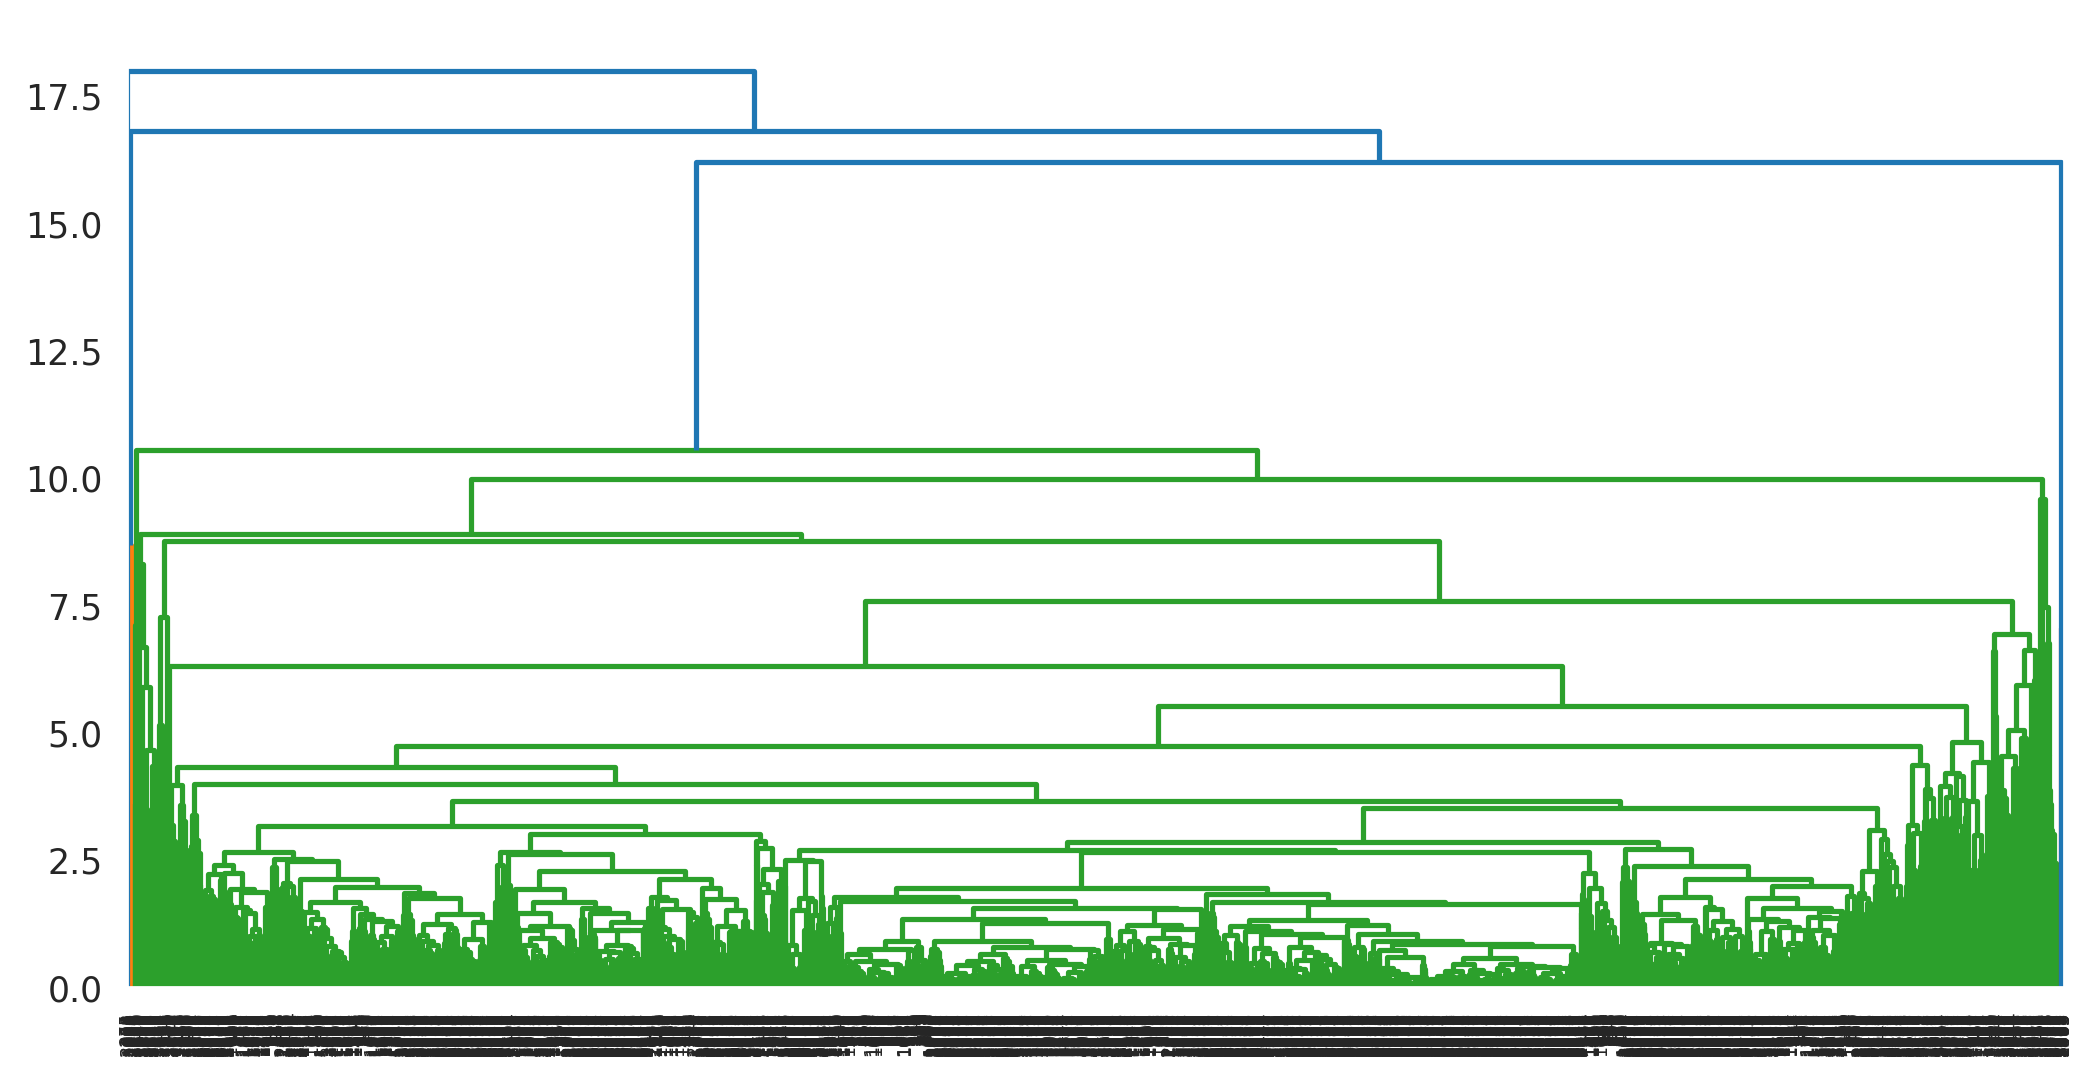

In [36]:
Dendrogram_a=sch.dendrogram(sch.linkage(df_scaled.iloc[:,:-1],method='average'))

In [37]:
hc_a=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='average')
hc_a
y_hc_a=hc_a.fit_predict(df_scaled.iloc[:,:-1])
y_hc_a
df_scaled['h_clusterid']=pd.DataFrame(y_hc_a)
df_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                        
1    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
2    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
3    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
4    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
5     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
4017 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
4018 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
4019 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
4020 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4021 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1       -1.104065          -0.328603        -0.362168           1.395454   
2       -0.999926          -0.328603        -0.362168           1.379957   
3       -0.791649          -0.328603        -0.362168           1.411920   
4       -1.104065          -0.328603        -0.362168           1.372208   
5        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
4017    -0.791649          -0.185750        -0.098503          -1.315120   
4018    -0.687511          -0.328603        -0.362168          -1.318994   
4019    -0.375096          -0.328603        -0.362168          -1.315604   
4020    -1.104065           0.028531        -0.098503          -1.316088   
4021    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  clusterid  h_clusterid  
ID#                                     
1    -0.766919          1          0.0  
2    -0.766919          1          0.0  
3    -0.766919          1          0.0  
4    -0.766919          1          0.0  
5     1.303918          0          0.0  
...        ...        ...          ...  
4017  1.303918          1          NaN  
4018  1.303918          1          NaN  
4019  1.303918          1          NaN  
4020 -0.766919          1          NaN  
4021 -0.766919          1          NaN  

[3999 rows x 13 columns]

In [38]:
df_scaled.groupby('h_clusterid').agg(['mean']).reset_index()

h_clusterid   Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                   mean       mean      mean      mean      mean        mean   
0         0.0  0.002670   0.001125  0.001723  0.000593  0.000379    0.001445   
1         1.0  0.476739  -0.186299  2.135821 -0.098242 -0.062767    2.076415   

  Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll    Award?  \
         mean              mean            mean              mean      mean   
0    0.002134          0.001584        0.001722          0.007196  0.000463   
1   -0.479234         -0.328603       -0.362168          1.534930  1.303918   

  clusterid  
       mean  
0  0.673208  
1  0.000000

#Centroid Linkage

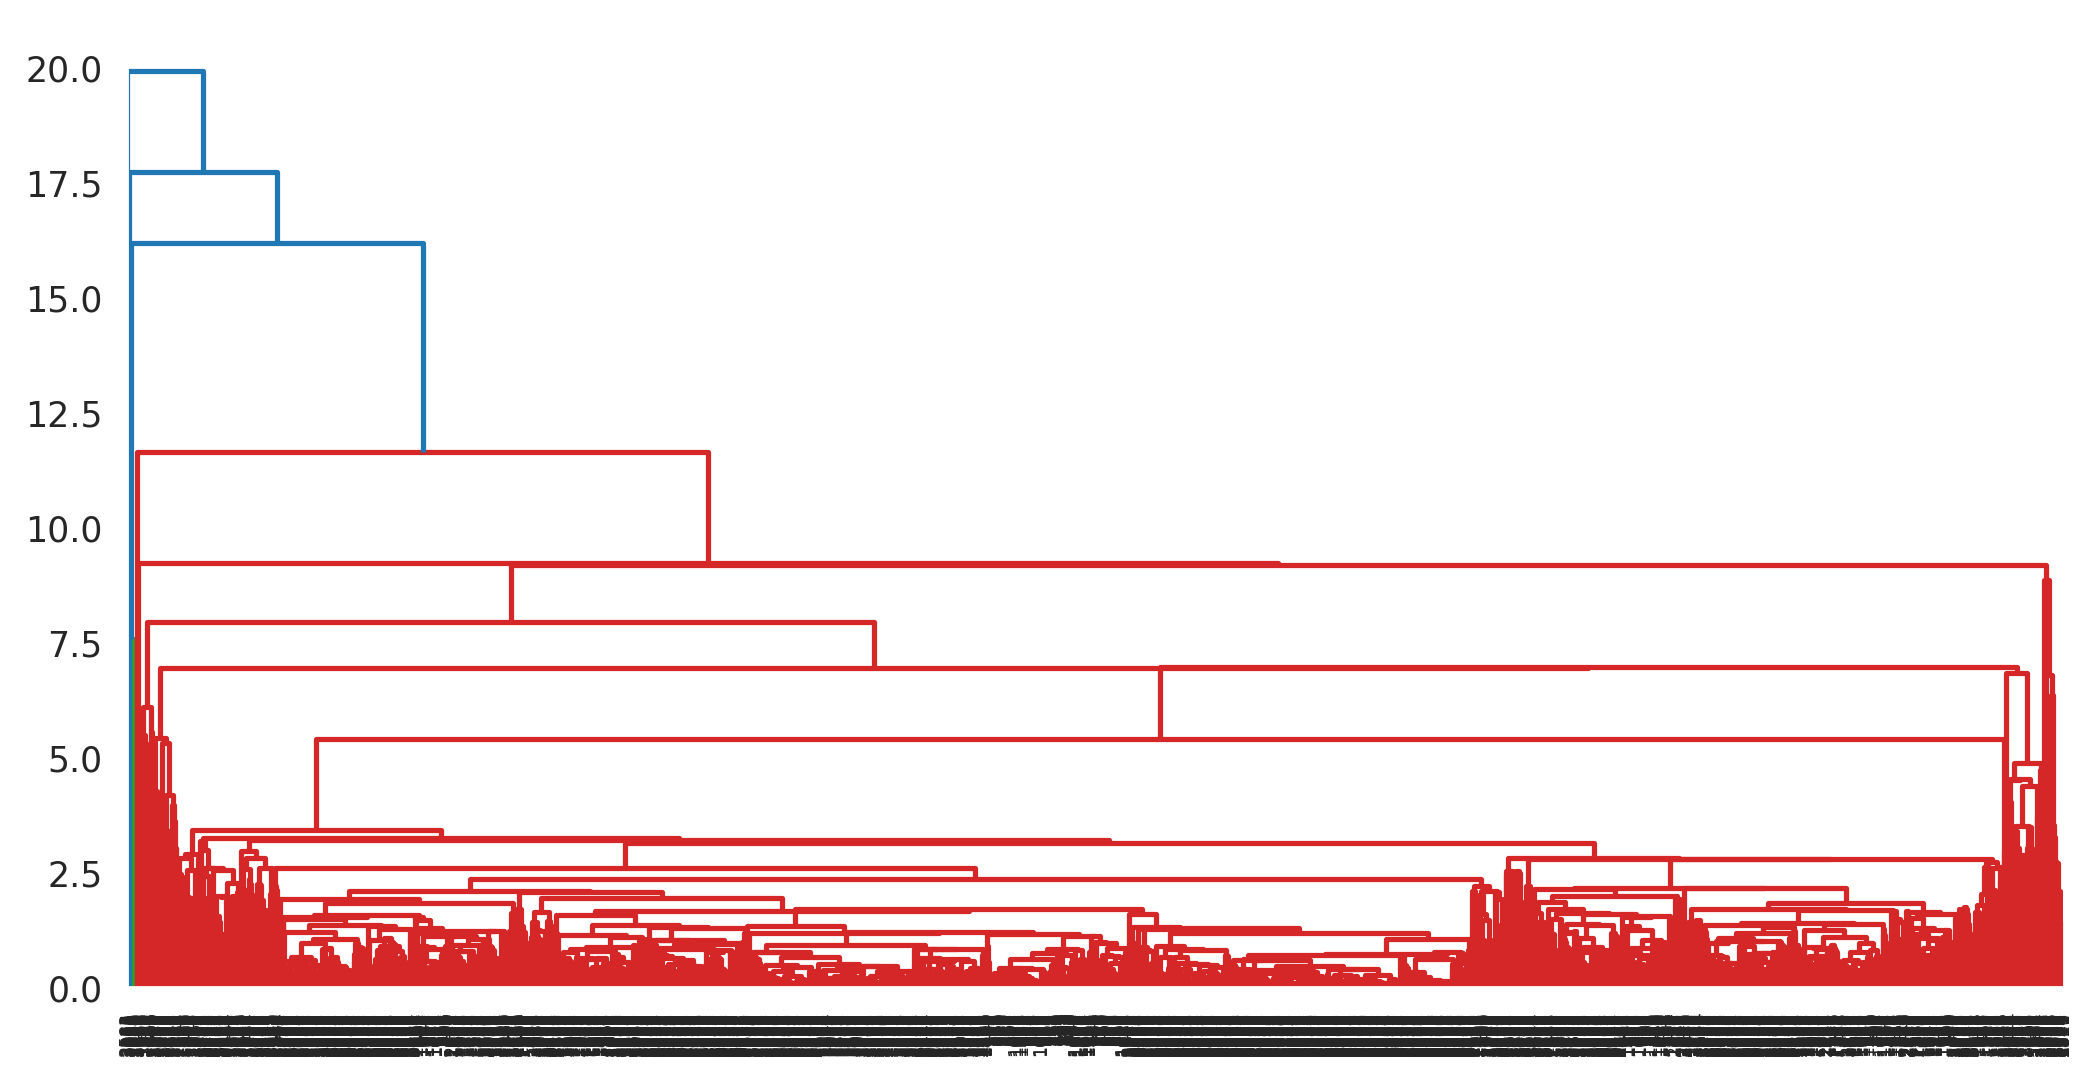

In [39]:
Dendrogram_ct=sch.dendrogram(sch.linkage(df_scaled.iloc[:,:-1],method='centroid'))

In [40]:
hc_ct=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
hc_ct
y_hc_ct=hc_ct.fit_predict(df_scaled.iloc[:,:-1])
y_hc_ct
df_scaled['h_clusterid']=pd.DataFrame(y_hc_ct)
df_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                        
1    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
2    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
3    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
4    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
5     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
4017 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
4018 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
4019 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
4020 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4021 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1       -1.104065          -0.328603        -0.362168           1.395454   
2       -0.999926          -0.328603        -0.362168           1.379957   
3       -0.791649          -0.328603        -0.362168           1.411920   
4       -1.104065          -0.328603        -0.362168           1.372208   
5        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
4017    -0.791649          -0.185750        -0.098503          -1.315120   
4018    -0.687511          -0.328603        -0.362168          -1.318994   
4019    -0.375096          -0.328603        -0.362168          -1.315604   
4020    -1.104065           0.028531        -0.098503          -1.316088   
4021    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  clusterid  h_clusterid  
ID#                                     
1    -0.766919          1          1.0  
2    -0.766919          1          1.0  
3    -0.766919          1          1.0  
4    -0.766919          1          0.0  
5     1.303918          0          1.0  
...        ...        ...          ...  
4017  1.303918          1          NaN  
4018  1.303918          1          NaN  
4019  1.303918          1          NaN  
4020 -0.766919          1          NaN  
4021 -0.766919          1          NaN  

[3999 rows x 13 columns]

In [41]:
df_scaled.groupby('h_clusterid').agg(['mean']).reset_index()

h_clusterid   Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                   mean       mean      mean      mean      mean        mean   
0         0.0  0.119941  -0.022844  0.088404 -0.048477 -0.004223    0.056559   
1         1.0 -0.049378   0.011730 -0.036100  0.022408  0.002405   -0.022343   

  Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll    Award?  \
         mean              mean            mean              mean      mean   
0    0.053784          0.020627        0.033221          0.393343  0.078320   
1   -0.021041         -0.007016       -0.012436         -0.164198 -0.033733   

  clusterid  
       mean  
0  0.626939  
1  0.693566

#OR Hyperparameter Tuning



In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, make_scorer  # Import necessary modules

params = {'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'linkage': ['ward', 'complete', 'average', 'single']}
# Use make_scorer to create a scorer from silhouette_score
grid = GridSearchCV(AgglomerativeClustering(), param_grid=params, scoring=make_scorer(silhouette_score), cv=5)
grid.fit(df_scaled.iloc[:,:-1]) # Fit using only feature columns, excluding the cluster labels

GridSearchCV(cv=5, estimator=AgglomerativeClustering(),
             param_grid={'linkage': ['ward', 'complete', 'average', 'single'],
                         'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring=make_scorer(silhouette_score, response_method='predict'))

In [43]:
grid.best_params_

{'linkage': 'ward', 'n_clusters': 1}

In [44]:
hc_ct=AgglomerativeClustering(n_clusters=1,metric='euclidean',linkage='ward')
hc_ct
y_hc_ct=hc_ct.fit_predict(df_scaled.iloc[:,:-1])
y_hc_ct
df_scaled['h_clusterid']=pd.DataFrame(y_hc_ct)
df_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                        
1    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
2    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
3    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
4    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
5     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
4017 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
4018 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
4019 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
4020 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4021 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1       -1.104065          -0.328603        -0.362168           1.395454   
2       -0.999926          -0.328603        -0.362168           1.379957   
3       -0.791649          -0.328603        -0.362168           1.411920   
4       -1.104065          -0.328603        -0.362168           1.372208   
5        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
4017    -0.791649          -0.185750        -0.098503          -1.315120   
4018    -0.687511          -0.328603        -0.362168          -1.318994   
4019    -0.375096          -0.328603        -0.362168          -1.315604   
4020    -1.104065           0.028531        -0.098503          -1.316088   
4021    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  clusterid  h_clusterid  
ID#                                     
1    -0.766919          1          0.0  
2    -0.766919          1          0.0  
3    -0.766919          1          0.0  
4    -0.766919          1          0.0  
5     1.303918          0          0.0  
...        ...        ...          ...  
4017  1.303918          1          NaN  
4018  1.303918          1          NaN  
4019  1.303918          1          NaN  
4020 -0.766919          1          NaN  
4021 -0.766919          1          NaN  

[3999 rows x 13 columns]

In [45]:
df_scaled.groupby('h_clusterid').agg(['mean']).reset_index()

h_clusterid   Balance Qual_miles cc1_miles cc2_miles cc3_miles Bonus_miles  \
                   mean       mean      mean      mean      mean        mean   
0         0.0  0.002789   0.001078   0.00226  0.000568  0.000363    0.001967   

  Bonus_trans Flight_miles_12mo Flight_trans_12 Days_since_enroll    Award?  \
         mean              mean            mean              mean      mean   
0    0.002013          0.001501        0.001631           0.00758  0.000791   

  clusterid  
       mean  
0  0.673038

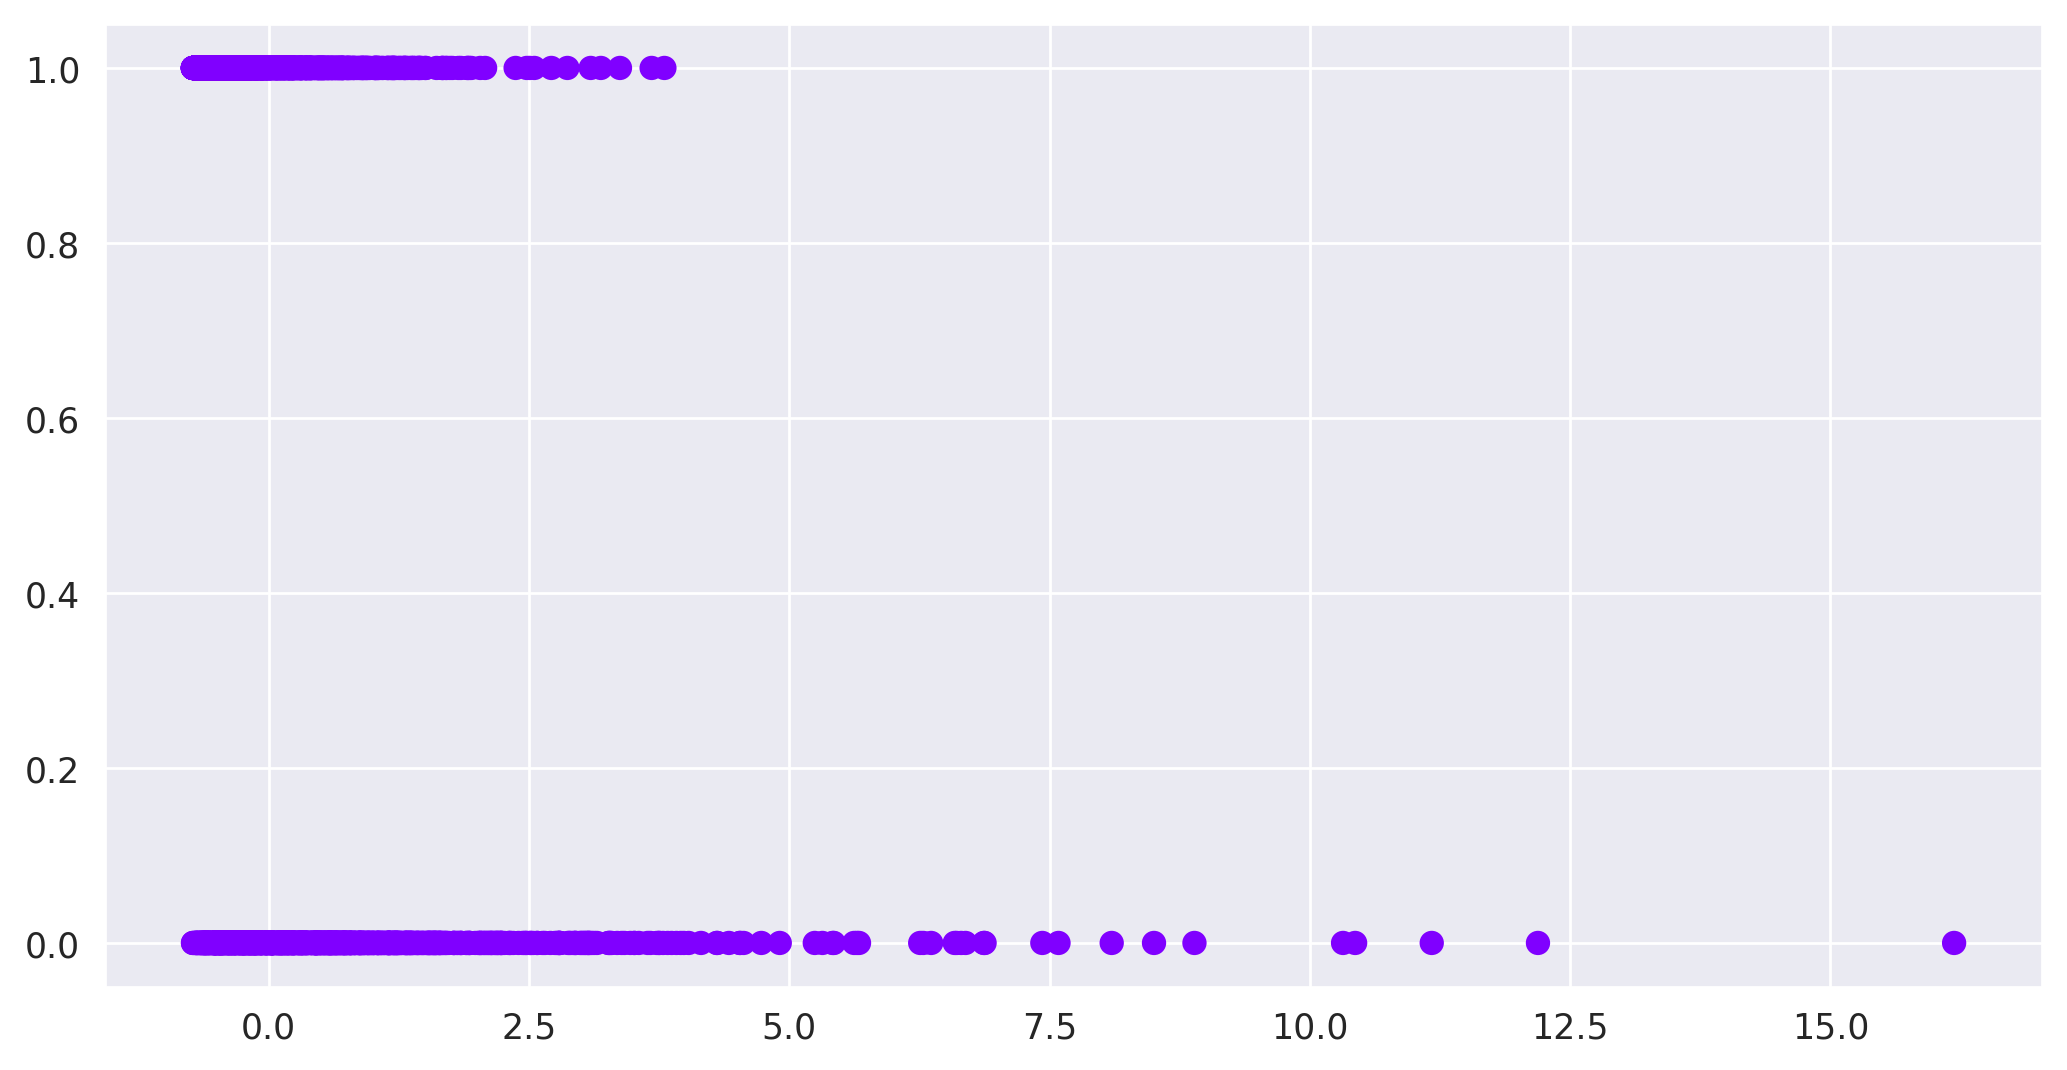

In [46]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 11], c=y_hc_ct, cmap='rainbow')

#DBSCAN

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
#Selecting minpts default 3 or no of columns+1=11+1=12
neighbor=NearestNeighbors(n_neighbors=3).fit(df_scaled.iloc[:,:-2])
distances,indices=neighbor.kneighbors(df_scaled.iloc[:,:-2])
distances=np.sort(distances[:,1],axis=0)
distances

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-Distance Graph')

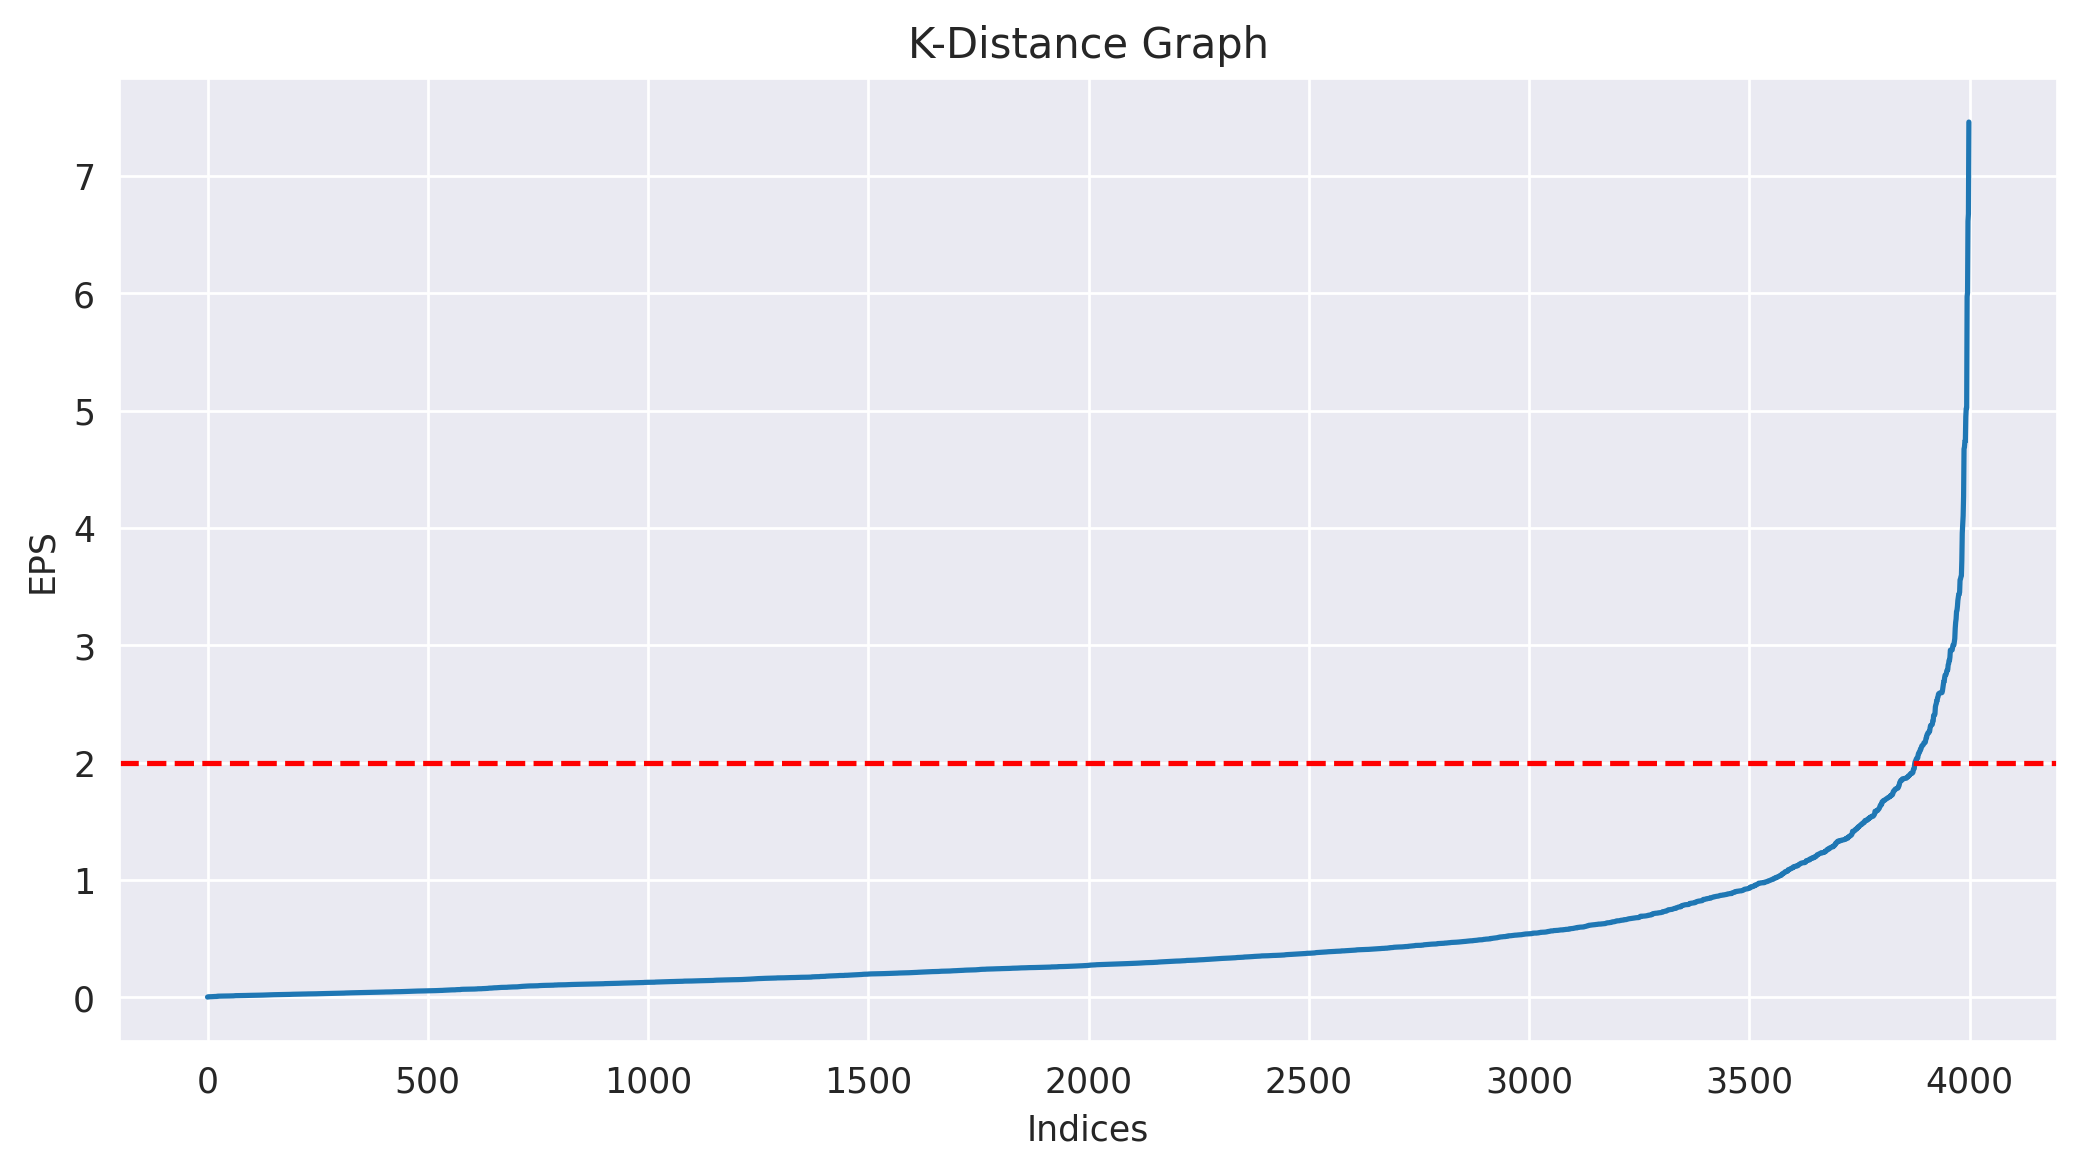

In [48]:
plt.plot(distances)
plt.axhline(y=2,linestyle='--',color='r')
plt.xlabel('Indices')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [56]:
db=DBSCAN(eps=1,min_samples=3).fit_predict(df_scaled.iloc[:,:-2])
db
silhouette_score(df_scaled.iloc[:,:-2],db)

0.09390508562243595

In [49]:
db=DBSCAN(eps=2,min_samples=3).fit_predict(df_scaled.iloc[:,:-2])
db

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
silhouette_score(df_scaled.iloc[:,:-2],db)

0.2457363433586349

#Minpts=12

In [51]:
neighbor=NearestNeighbors(n_neighbors=12).fit(df_scaled.iloc[:,:-2])
distances_12,indices_12=neighbor.kneighbors(df_scaled.iloc[:,:-2])
distances_12=np.sort(distances_12[:,1],axis=0)
distances_12

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-Distance Graph')

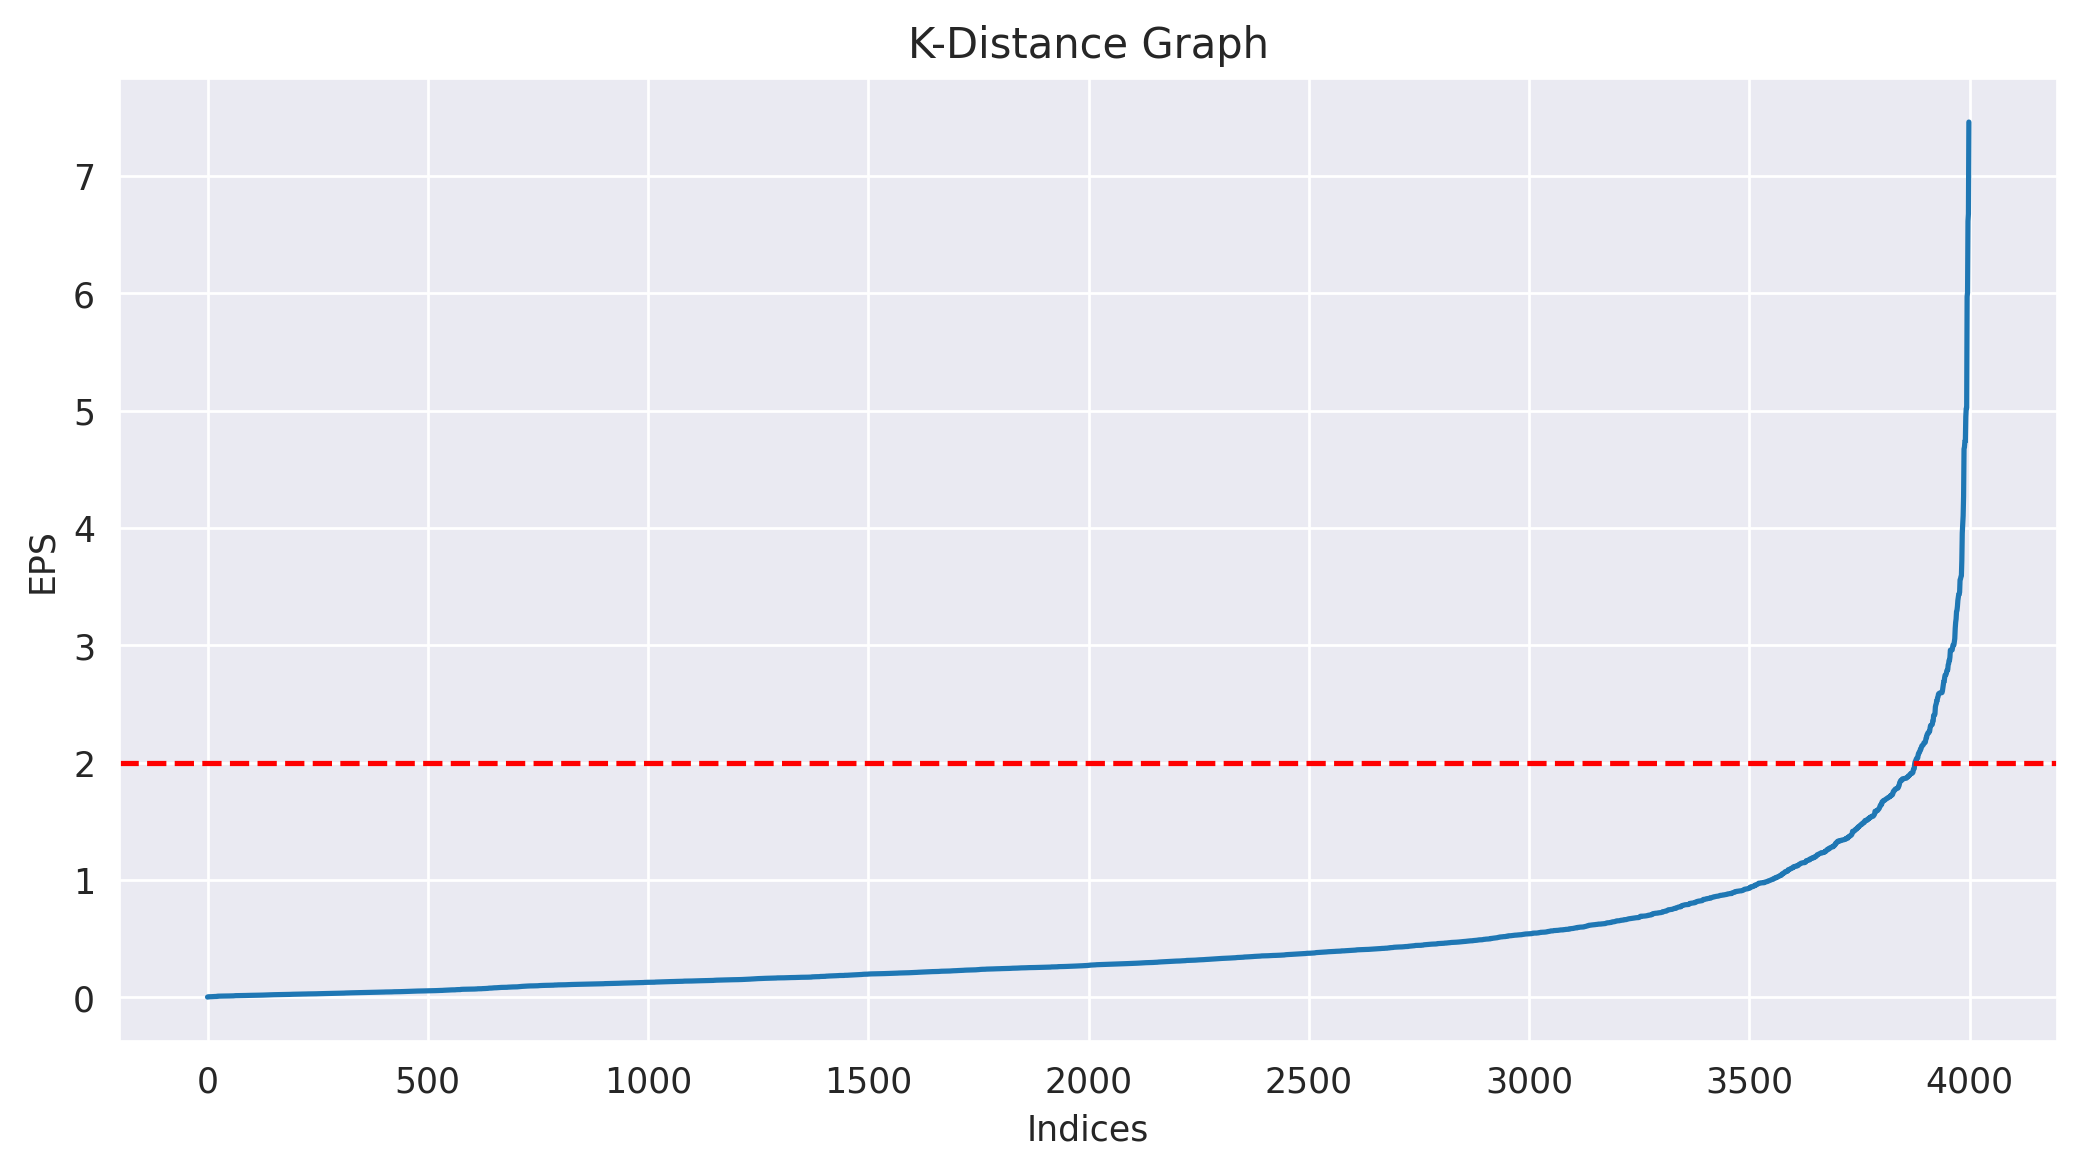

In [52]:
plt.plot(distances_12)
plt.axhline(y=2,linestyle='--',color='r')
plt.xlabel('Indices')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [53]:
db=DBSCAN(eps=2,min_samples=12).fit_predict(df_scaled.iloc[:,:-2])
db
silhouette_score(df_scaled.iloc[:,:-2],db)

0.255303940580989

#Hyperparameter Tuning

In [54]:
params = {'eps': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples': [3,4,5,6,7,8,9,10,11,12]}
# Use make_scorer to create a scorer from silhouette_score
grid = GridSearchCV(DBSCAN(), param_grid=params, scoring=make_scorer(silhouette_score), cv=5)
grid.fit(df_scaled.iloc[:,:-2]) # Fit using only feature columns, excluding the cluster labels

GridSearchCV(cv=5, estimator=DBSCAN(),
             param_grid={'eps': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             scoring=make_scorer(silhouette_score, response_method='predict'))

In [55]:
grid.best_params_

{'eps': 1, 'min_samples': 3}

1. Hierarchical clustering has high computational complexity and is sensitive to noise.
2. K-Means clustering requies to specify the number of clusters priory and is also sensitive to noise. It does not perform well on finding nonconvex shapes of clusters.
3. DBSCAN, epsilon and minpoints may be difficult to determine. But can handle noise.